# 1. Import modules and load MERFISH data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os

import matplotlib.pyplot as plt

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')

# 2. Load MERLin analysis results

In [2]:
merlin_output_folder = r'\\mendel\Mendel_SSD3\MERFISH_Analysis\20220525-hSTG'
# generate post-analysis folders
postanalysis_folder = os.path.join(merlin_output_folder, 'PostAnalysis')
if not os.path.exists(postanalysis_folder):
    print(f"Create postanalysis_folder: {postanalysis_folder}")
    os.makedirs(postanalysis_folder)
else:
    print(f"Use postanalysis_folder: {postanalysis_folder}")

Use postanalysis_folder: \\mendel\Mendel_SSD3\MERFISH_Analysis\20220525-hSTG\PostAnalysis


## Load metadata

In [3]:
# Load Cell information
cell_meta_data_file = os.path.join(merlin_output_folder, 'ExportCellMetadata', 'feature_metadata.csv')
cell_meta_data = pd.read_csv(cell_meta_data_file)
cell_meta_data

Unnamed: 0  fov       volume     center_x  \
0     113646512974226495271334562699592527153    0   828.982918   -40.341993   
1     114879167260311598224710419314194148133    0   152.394017  -125.715995   
2     123064631771067327447772010723601872757    0   419.614171   -72.471994   
3     136985995718260651203037326439795515065    0   402.482904   -33.543393   
4     138366438959278679659965720150671998799    0    70.134469   -55.785993   
...                                       ...  ...          ...          ...   
2469   30044429707992114198662202229148088978   87    92.625928  3641.398050   
2470  338332873752526803861920949530197515610   87   288.525035  3695.560051   
2471   36822862196477893961594840465426374318   87    91.172710  3659.974050   
2472   45069022956567908176346181261890681185   87  1432.393279  3642.910050   
2473   77960507544718583761805907720431968238   87   263.771809  3652.792050   

        center_y        min_x        max_x       min_y       max_y  
0    -202.104008   -89.330794     8.646808 -209.674808 -194.533208  
1    -210.960008  -170.006796   -81.425194 -256.438809 -165.481207  
2    -336.132012  -162.662796    17.718809 -343.486812 -328.777211  
3    -165.870007   -92.462794    25.376009 -179.866807 -151.873207  
4    -149.027407   -92.462794   -19.109192 -156.430807 -141.624006  
...          ...          ...          ...         ...         ...  
2469 -862.530010  3638.741250  3644.054850 -866.914810 -858.145209  
2470 -946.338012  3674.705251  3716.414852 -953.098812 -939.577212  
2471 -864.528010  3648.893250  3671.054851 -876.202810 -852.853209  
2472 -880.836010  3605.477249  3680.342851 -888.730810 -872.941210  
2473 -902.328011  3632.909250  3672.674851 -944.890812 -859.765210  

[2474 rows x 9 columns]

In [5]:
# Load decoded counts information
counts_file_mer = os.path.join(merlin_output_folder, 'ExportPartitionedBarcodes', 'barcodes_per_feature.csv')
df = pd.read_csv(counts_file_mer).rename(columns={'Unnamed: 0':'index'}).set_index('index')
#blanks = [f'Blank-{i}' for i in range(1, 11)]
for _c in df.columns:
    if 'Blank-' in _c:
        df = df.drop(columns=_c)
adata = anndata.AnnData(df)
adata.obs = adata.obs.merge(cell_meta_data, left_index=True, right_on='Unnamed: 0').set_index('Unnamed: 0')

df

SORBS2  NTNG1  FBN2  PAX6  ADAMTS6  \
index                                                                         
113646512974226495271334562699592527153     0.0    0.0   0.0   0.0      0.0   
114879167260311598224710419314194148133     0.0    0.0   0.0   0.0      0.0   
123064631771067327447772010723601872757     2.0    0.0   0.0   1.0      0.0   
136985995718260651203037326439795515065     0.0    0.0   0.0   0.0      0.0   
138366438959278679659965720150671998799     0.0    0.0   0.0   0.0      0.0   
...                                         ...    ...   ...   ...      ...   
30044429707992114198662202229148088978      0.0    0.0   0.0   0.0      0.0   
338332873752526803861920949530197515610     0.0    0.0   0.0   0.0      0.0   
36822862196477893961594840465426374318      0.0    0.0   0.0   1.0      0.0   
45069022956567908176346181261890681185      2.0    0.0   0.0   0.0      0.0   
77960507544718583761805907720431968238      0.0    0.0   0.0   0.0      0.0   

                                         DCN  CHST9  C10orf11  ROR2  SLC22A25  \
index                                                                           
113646512974226495271334562699592527153  0.0    2.0       1.0   1.0       1.0   
114879167260311598224710419314194148133  1.0    0.0       0.0   0.0       0.0   
123064631771067327447772010723601872757  0.0    0.0       1.0   0.0       0.0   
136985995718260651203037326439795515065  1.0    0.0       0.0   0.0       0.0   
138366438959278679659965720150671998799  0.0    0.0       0.0   0.0       0.0   
...                                      ...    ...       ...   ...       ...   
30044429707992114198662202229148088978   0.0    0.0       0.0   0.0       0.0   
338332873752526803861920949530197515610  0.0    0.0       0.0   0.0       0.0   
36822862196477893961594840465426374318   0.0    0.0       0.0   0.0       0.0   
45069022956567908176346181261890681185   0.0    0.0       3.0   0.0       0.0   
77960507544718583761805907720431968238   0.0    0.0       0.0   0.0       0.0   

                                         ...  ADAMTS17  ANKRD36BP2  ADAMTS19  \
index                                    ...                                   
113646512974226495271334562699592527153  ...       1.0         1.0       0.0   
114879167260311598224710419314194148133  ...       0.0         1.0       0.0   
123064631771067327447772010723601872757  ...       0.0         0.0       0.0   
136985995718260651203037326439795515065  ...       0.0         0.0       0.0   
138366438959278679659965720150671998799  ...       0.0         0.0       0.0   
...                                      ...       ...         ...       ...   
30044429707992114198662202229148088978   ...       0.0         0.0       0.0   
338332873752526803861920949530197515610  ...       0.0         0.0       0.0   
36822862196477893961594840465426374318   ...       0.0         0.0       0.0   
45069022956567908176346181261890681185   ...       0.0         0.0       1.0   
77960507544718583761805907720431968238   ...       0.0         0.0       0.0   

                                         HGF  KIAA1024  GLIS3  BEND4  DNAH6  \
index                                                                         
113646512974226495271334562699592527153  0.0       0.0    0.0    0.0    0.0   
114879167260311598224710419314194148133  0.0       0.0    0.0    0.0    0.0   
123064631771067327447772010723601872757  0.0       0.0    0.0    0.0    1.0   
136985995718260651203037326439795515065  0.0       0.0    0.0    0.0    0.0   
138366438959278679659965720150671998799  0.0       0.0    0.0    0.0    0.0   
...                                      ...       ...    ...    ...    ...   
30044429707992114198662202229148088978   0.0       0.0    0.0    0.0    0.0   
338332873752526803861920949530197515610  0.0       0.0    0.0    0.0    0.0   
36822862196477893961594840465426374318   0.0       0.0    0.0    0.0    0.0   
45069022956567908176346181261890681185   0.0     

# 4. Preprocess and filter the MERFISH data 

In [6]:
# Calculate quality control metrics
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

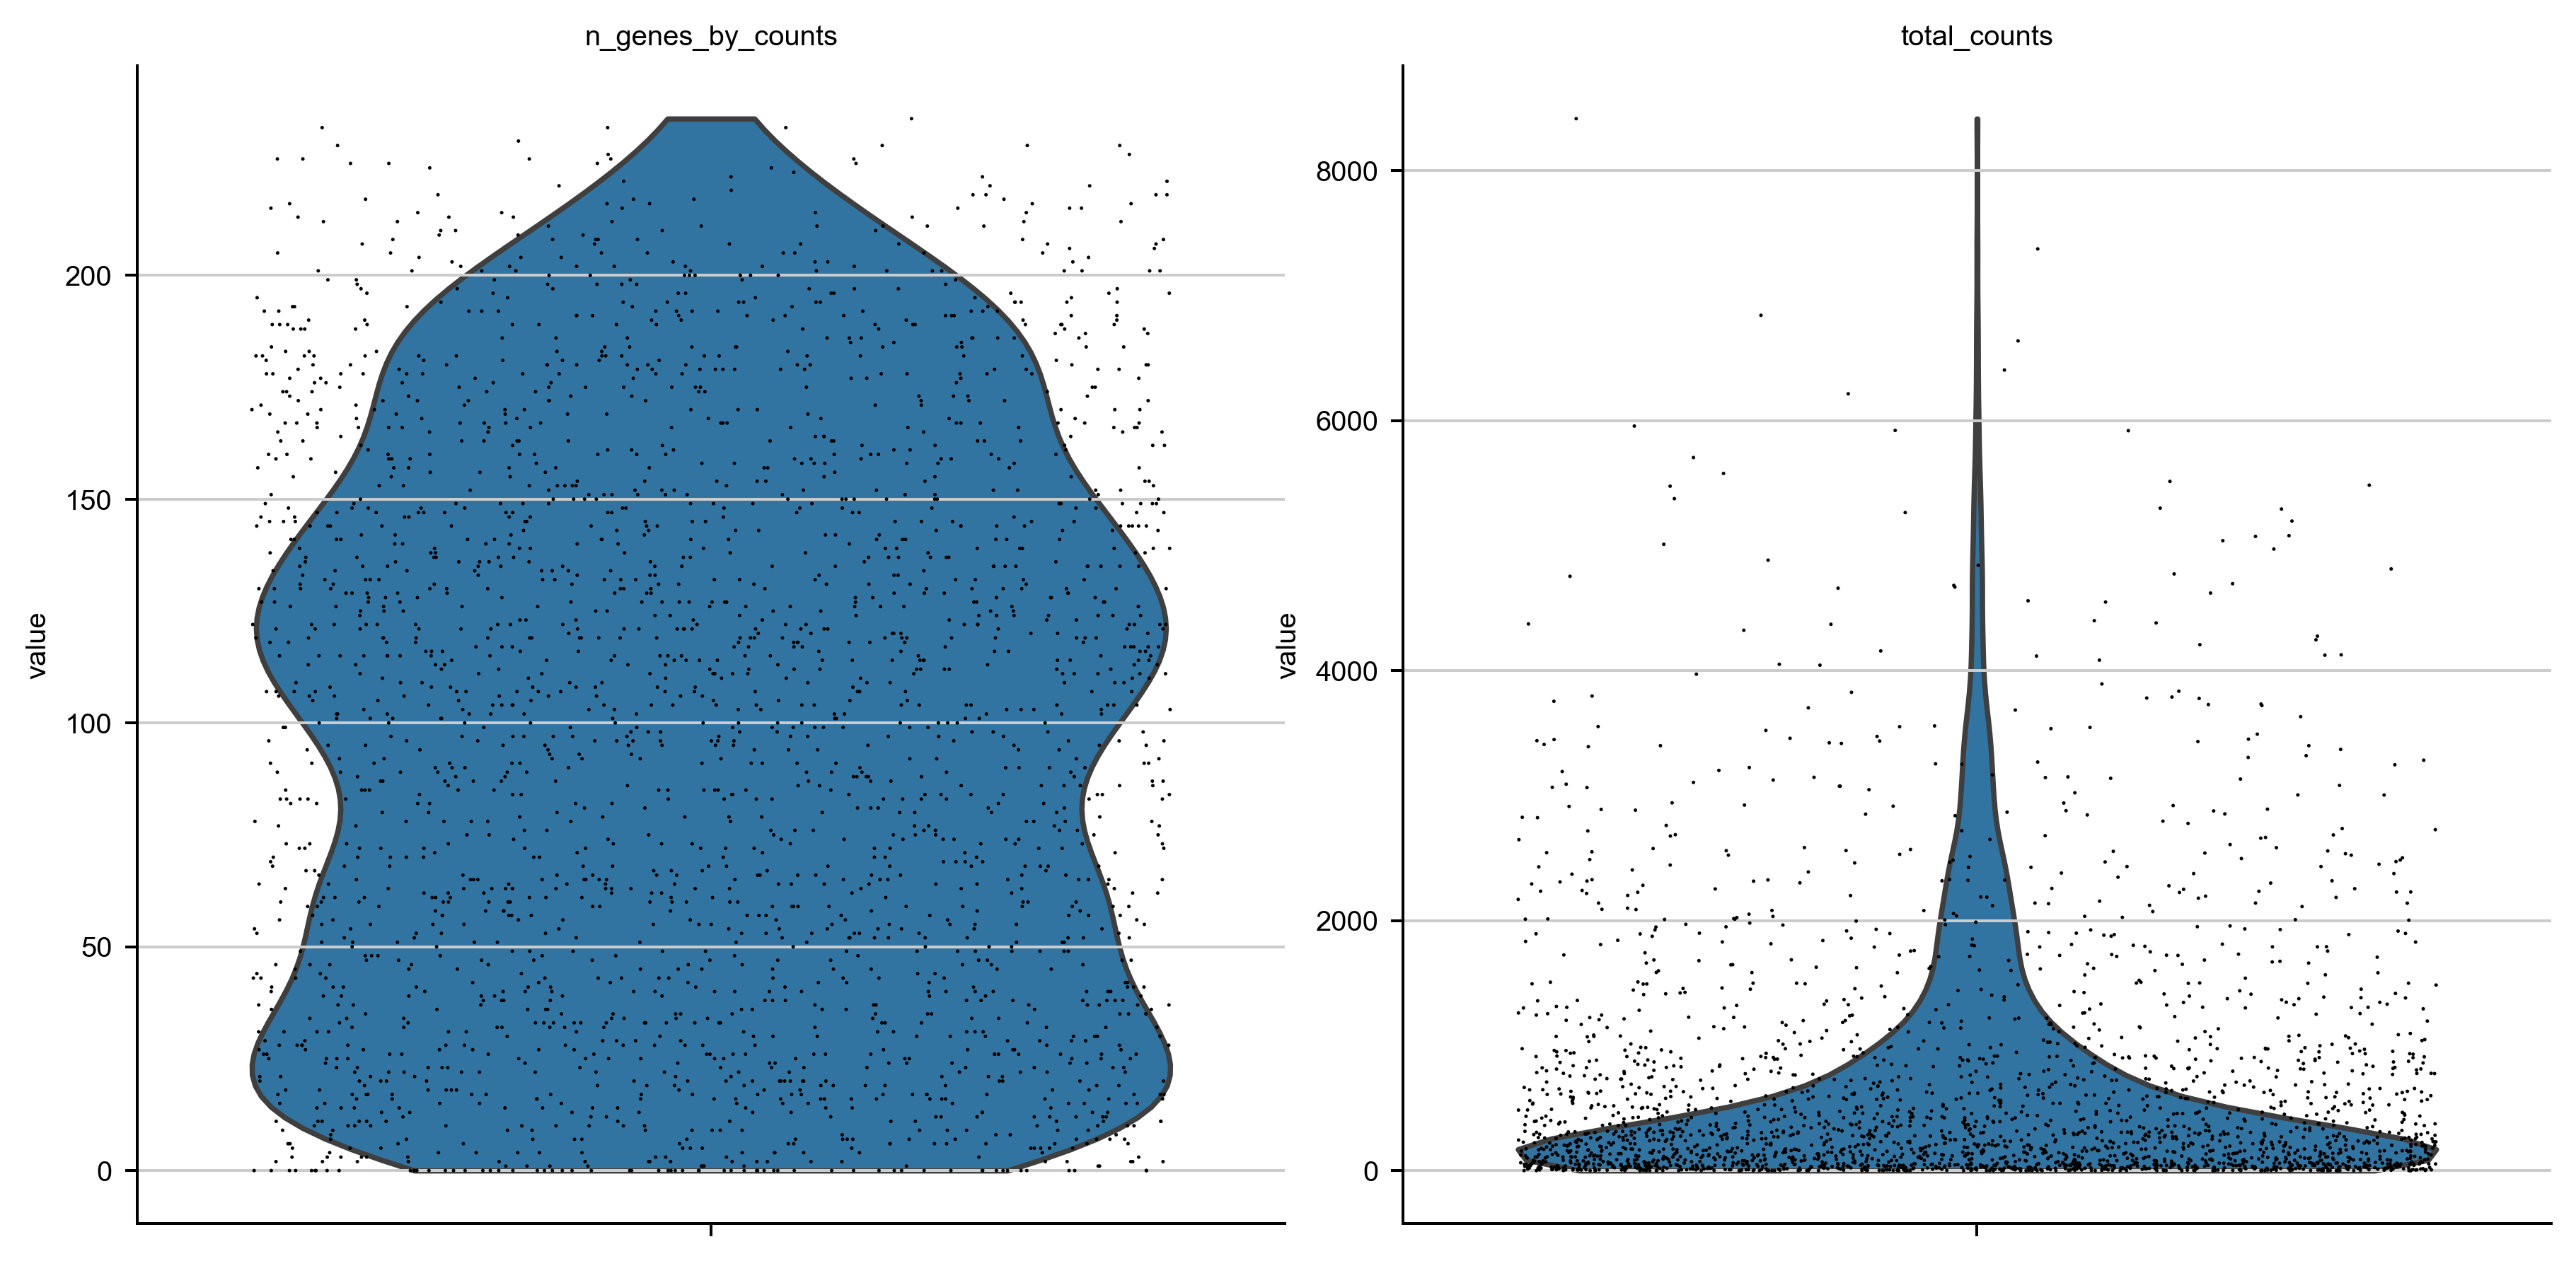

In [7]:
# A violin plot of some of the computed quality measures:
# - the number of genes expressed in the count matrix
# - the total counts per cell
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

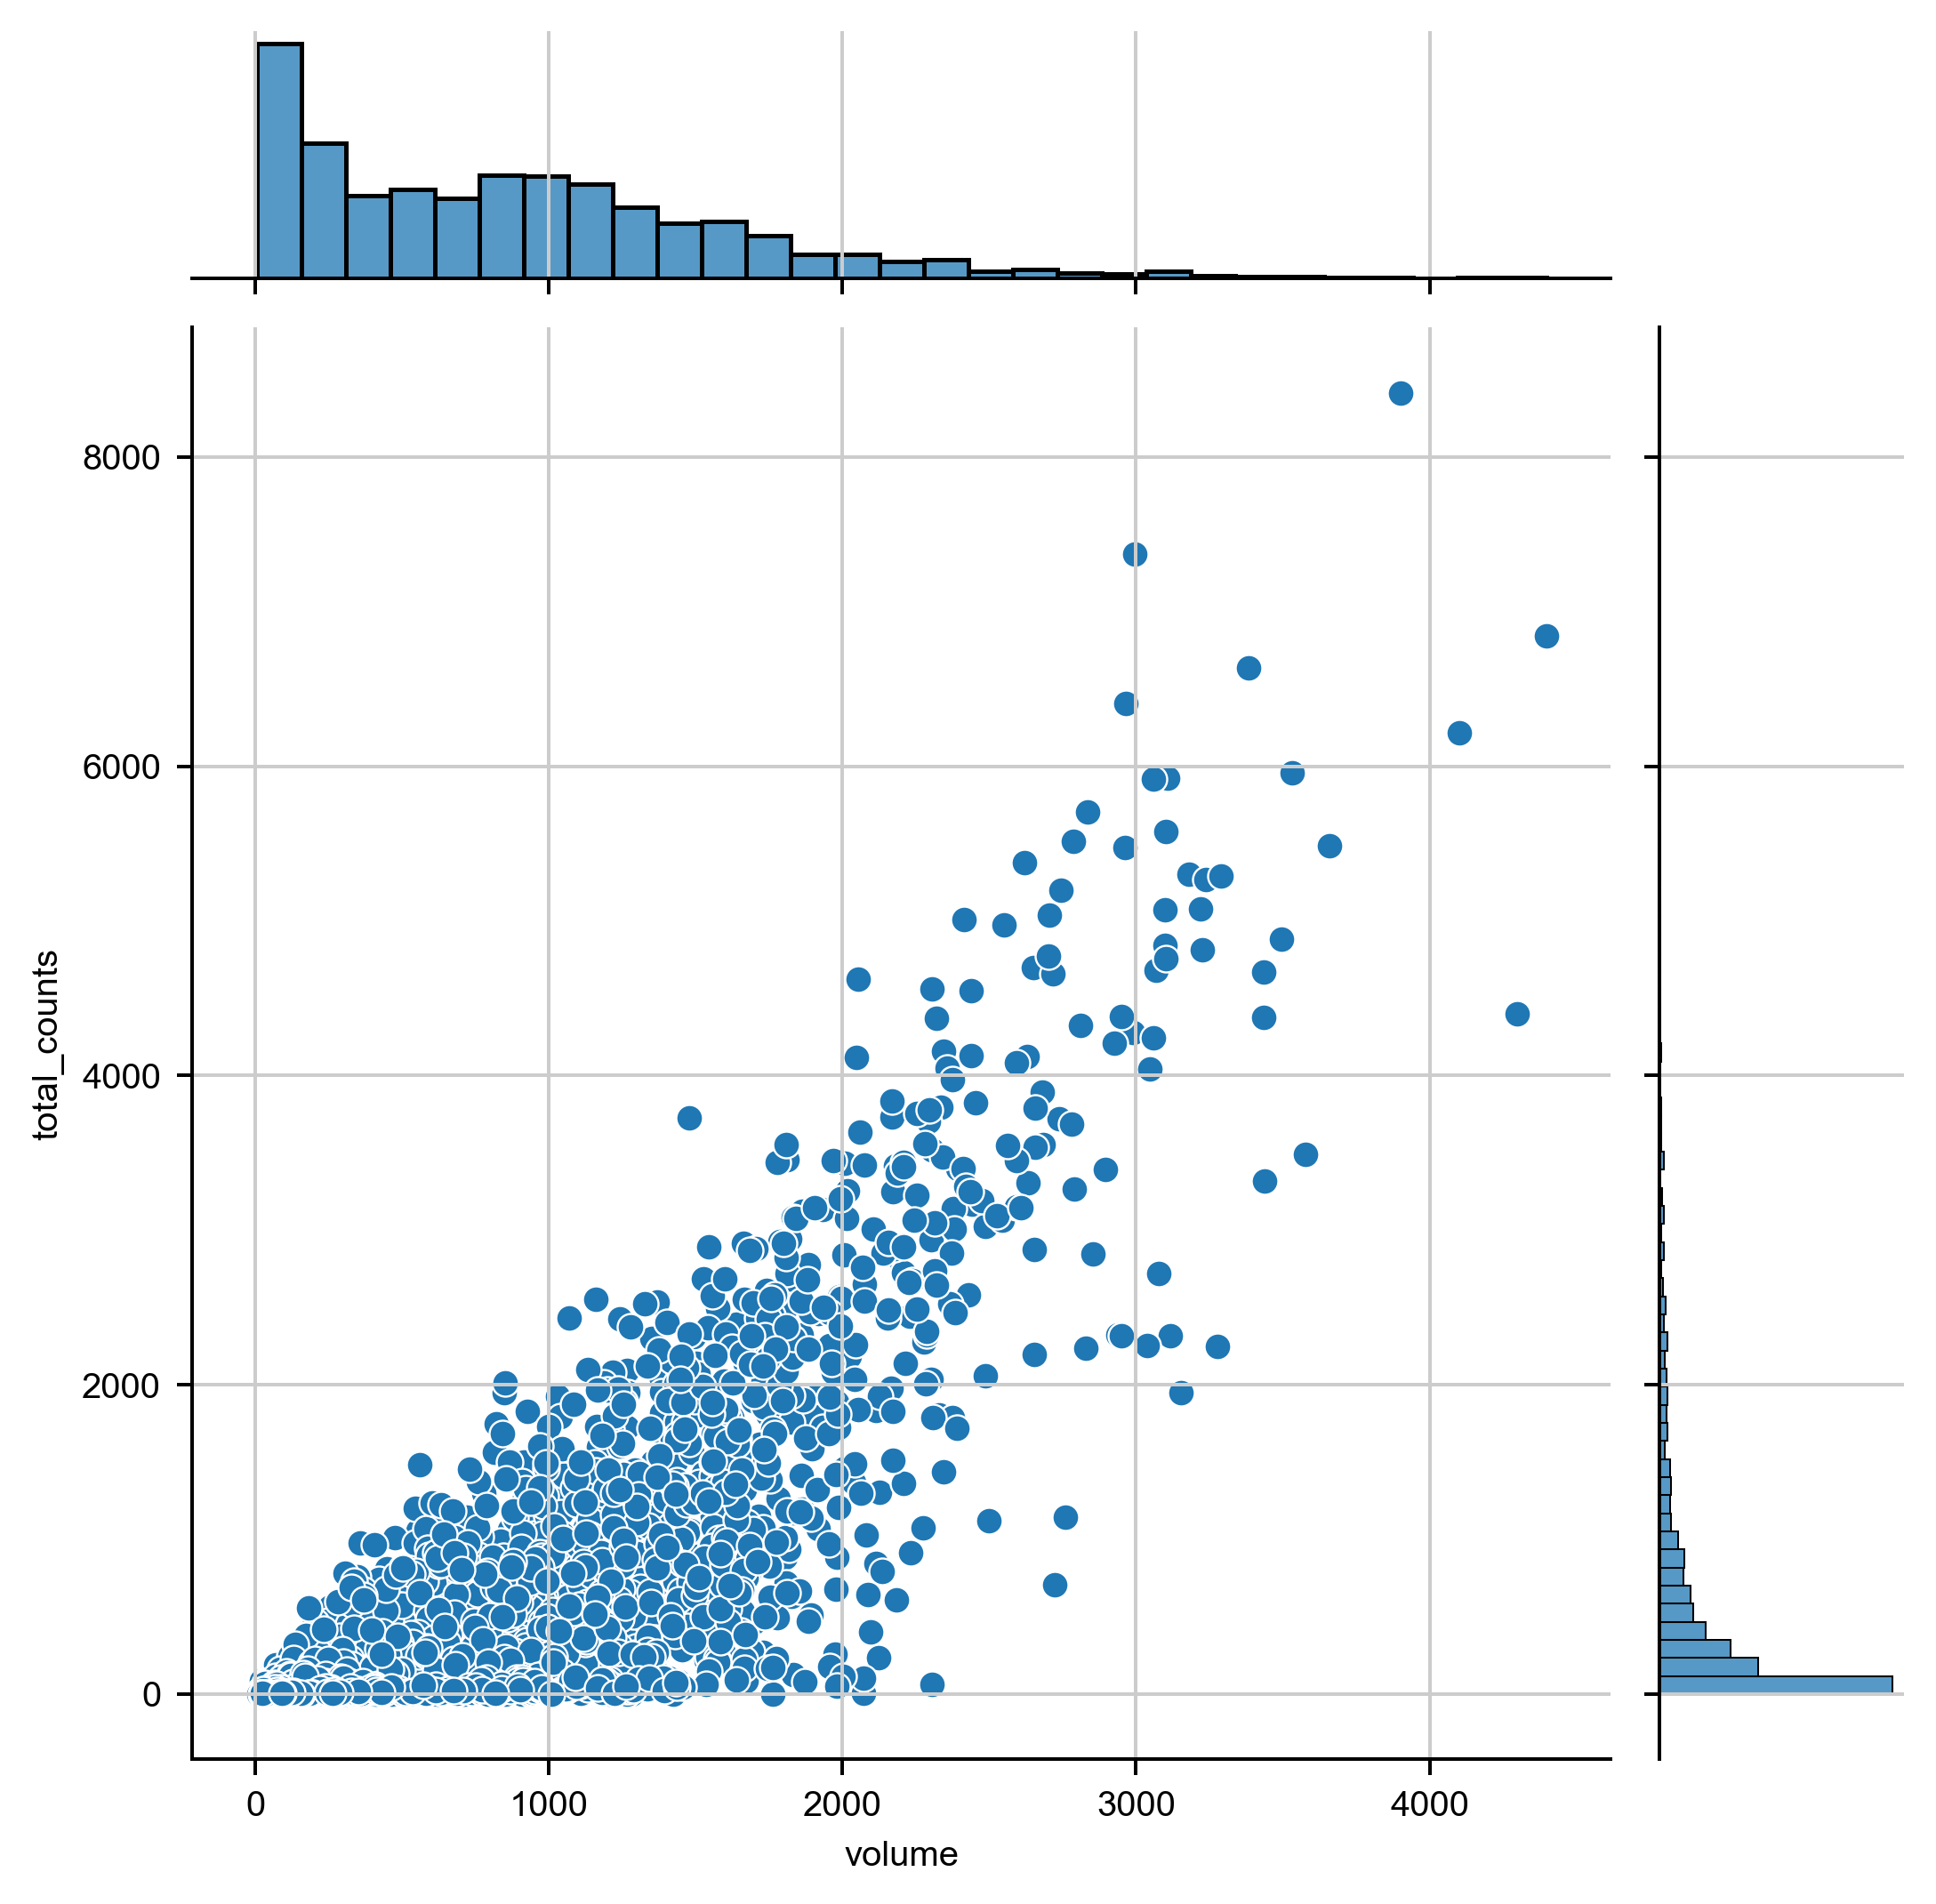

In [8]:
sns.jointplot(data=adata.obs, x='volume', y='total_counts')

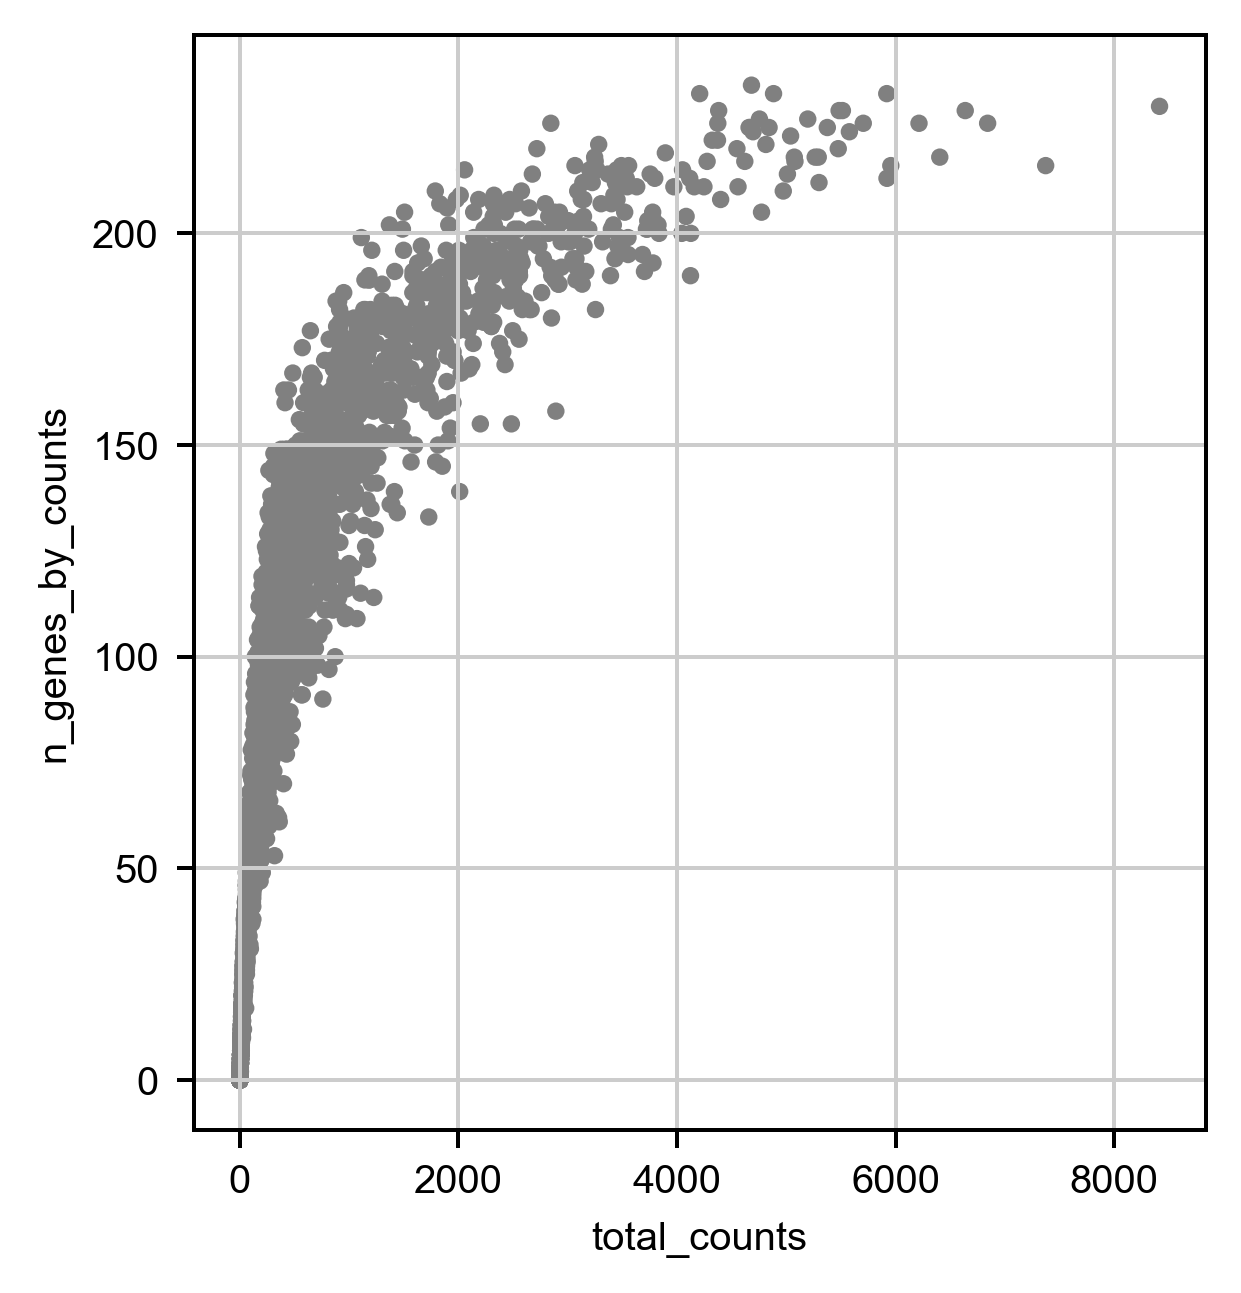

In [9]:
# Plot the distributions of gene counts
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [10]:
gene_count_threshold = 10
total_count_threshold = 20
volume_threshold = 200
volume_upper_threshold = 6000
# Filtering
adata = adata[adata.obs['n_genes_by_counts'] > gene_count_threshold]
adata = adata[adata.obs['total_counts'] > total_count_threshold]
adata = adata[adata.obs['volume'] > volume_threshold]
adata = adata[adata.obs['volume'] <= volume_upper_threshold]

print(len(adata) / len(cell_meta_data) , len(adata))

0.7497978981406629 1855


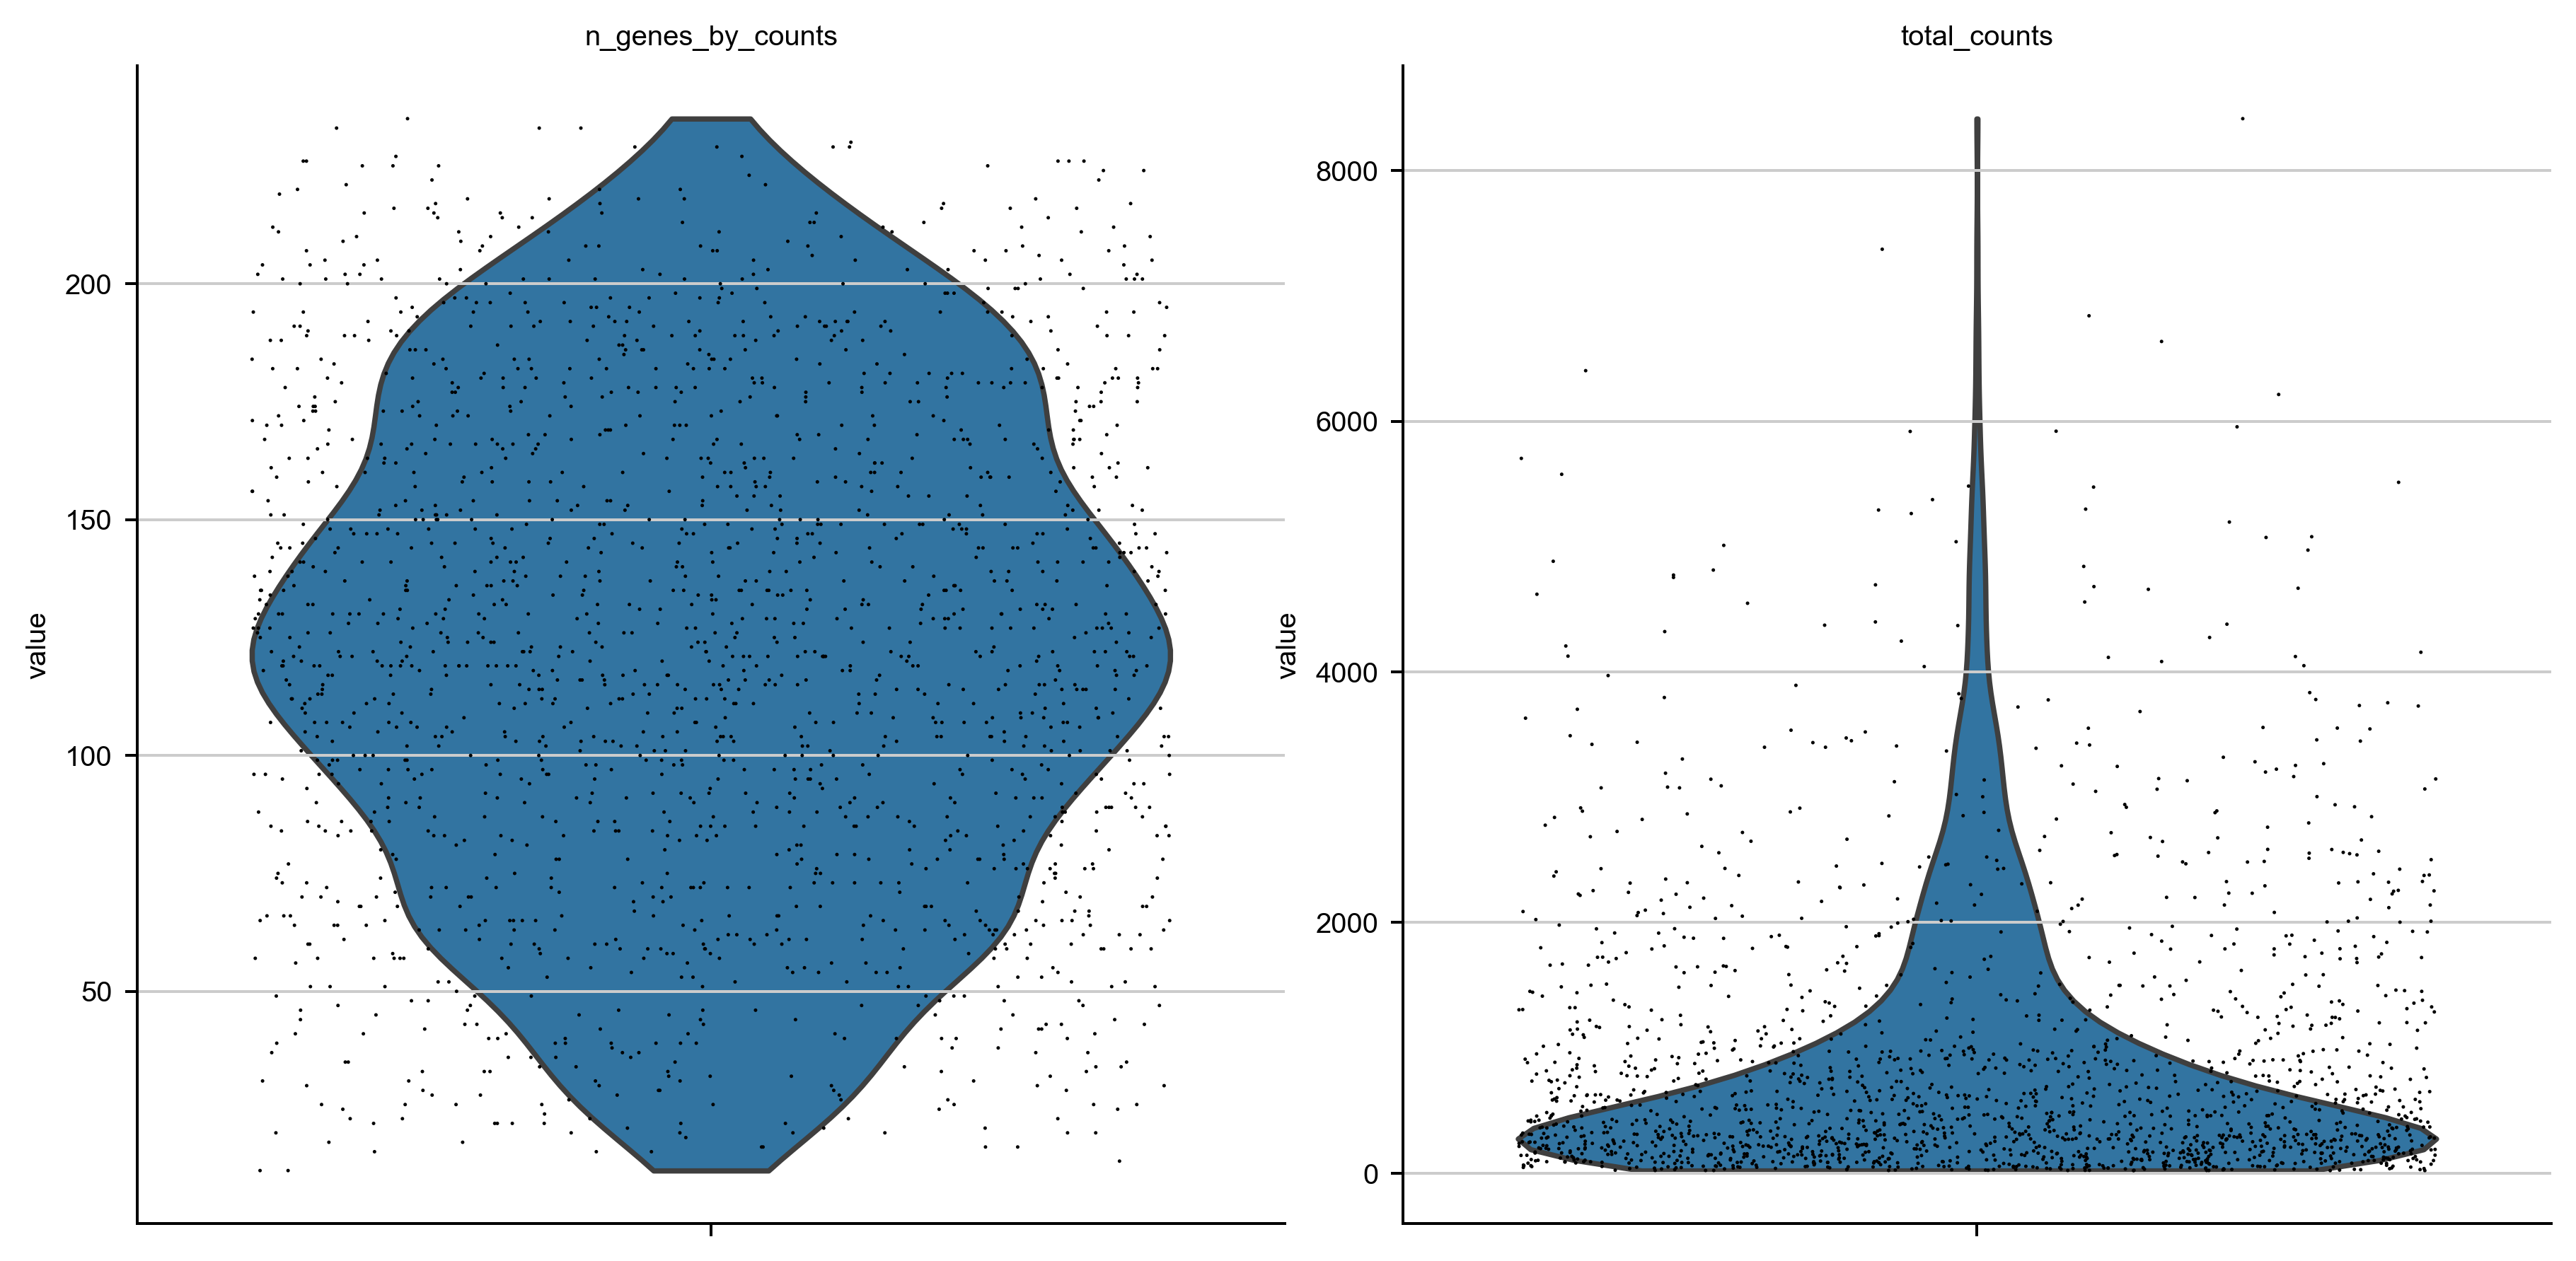

In [11]:
# A violin plot of some of the computed quality measures:
# - the number of genes expressed in the count matrix
# - the total counts per cell
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

## 4. PCA and UMAP of the MERFISH data (for quick test)

E:\Users\puzheng\AppData\anaconda3\envs\merlin_postanalysis\lib\site-packages\scanpy\preprocessing\_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


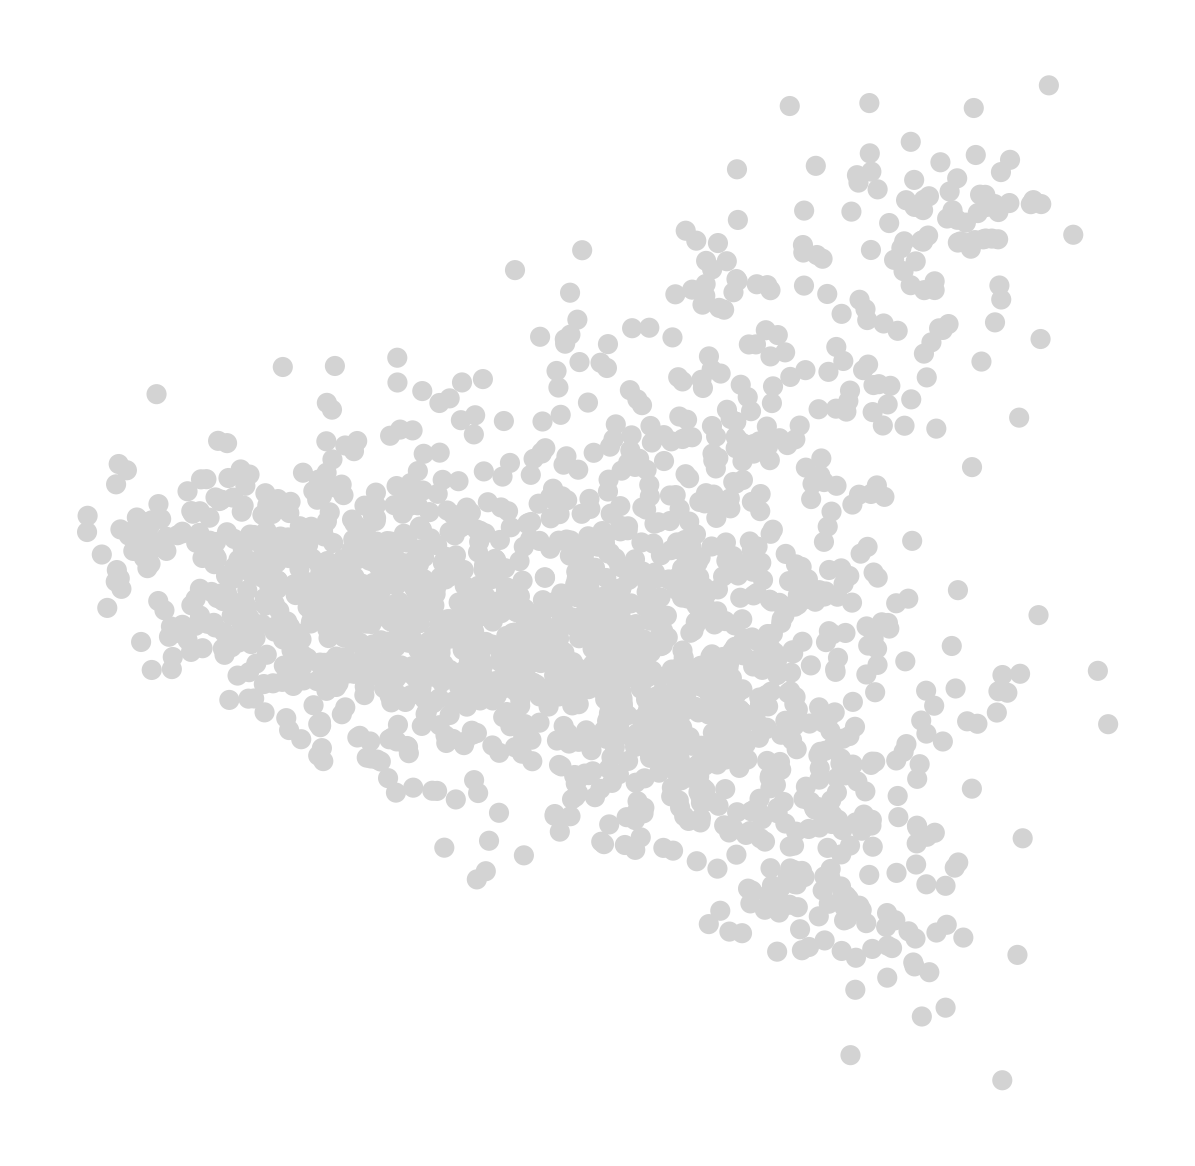

Wall time: 46.9 s


In [12]:
%%time
# Total-count normalize (library-size correct) the data matrix to 10,000 reads per cell
sc.pp.normalize_total(adata, target_sum=1e2)
# Logarithmize the data
sc.pp.log1p(adata)
# Regress out total counts
sc.pp.regress_out(adata, 'total_counts')
# Convert gene expressions to Z-scores
sc.pp.scale(adata, max_value=10)
# Principal component analysis
sc.tl.pca(adata, svd_solver='arpack')
# Plot the PCA results
sc.pl.pca(adata)

In [13]:
%%time
# Computing the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

Wall time: 13.9 s


In [14]:
%%time
# Clustering
sc.tl.leiden(adata, resolution=0.5)

Wall time: 116 ms


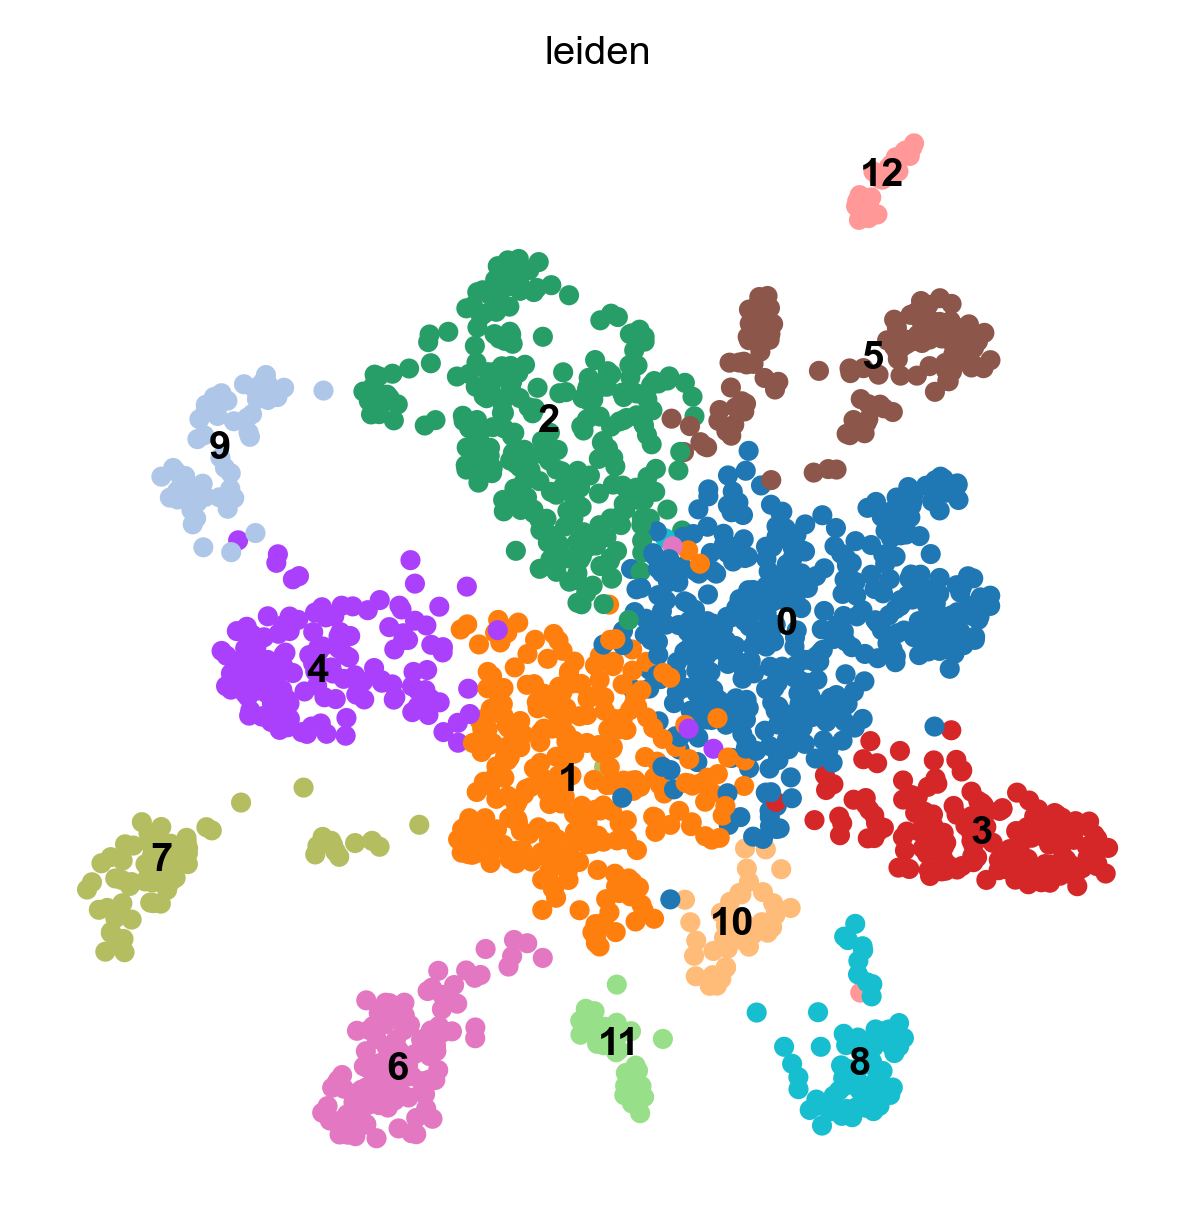

Wall time: 6.17 s


In [15]:
%%time
# Embed with UMAP
sc.tl.umap(adata)
# Plot the UMAP
sc.pl.umap(adata, color='leiden', legend_loc='on data')

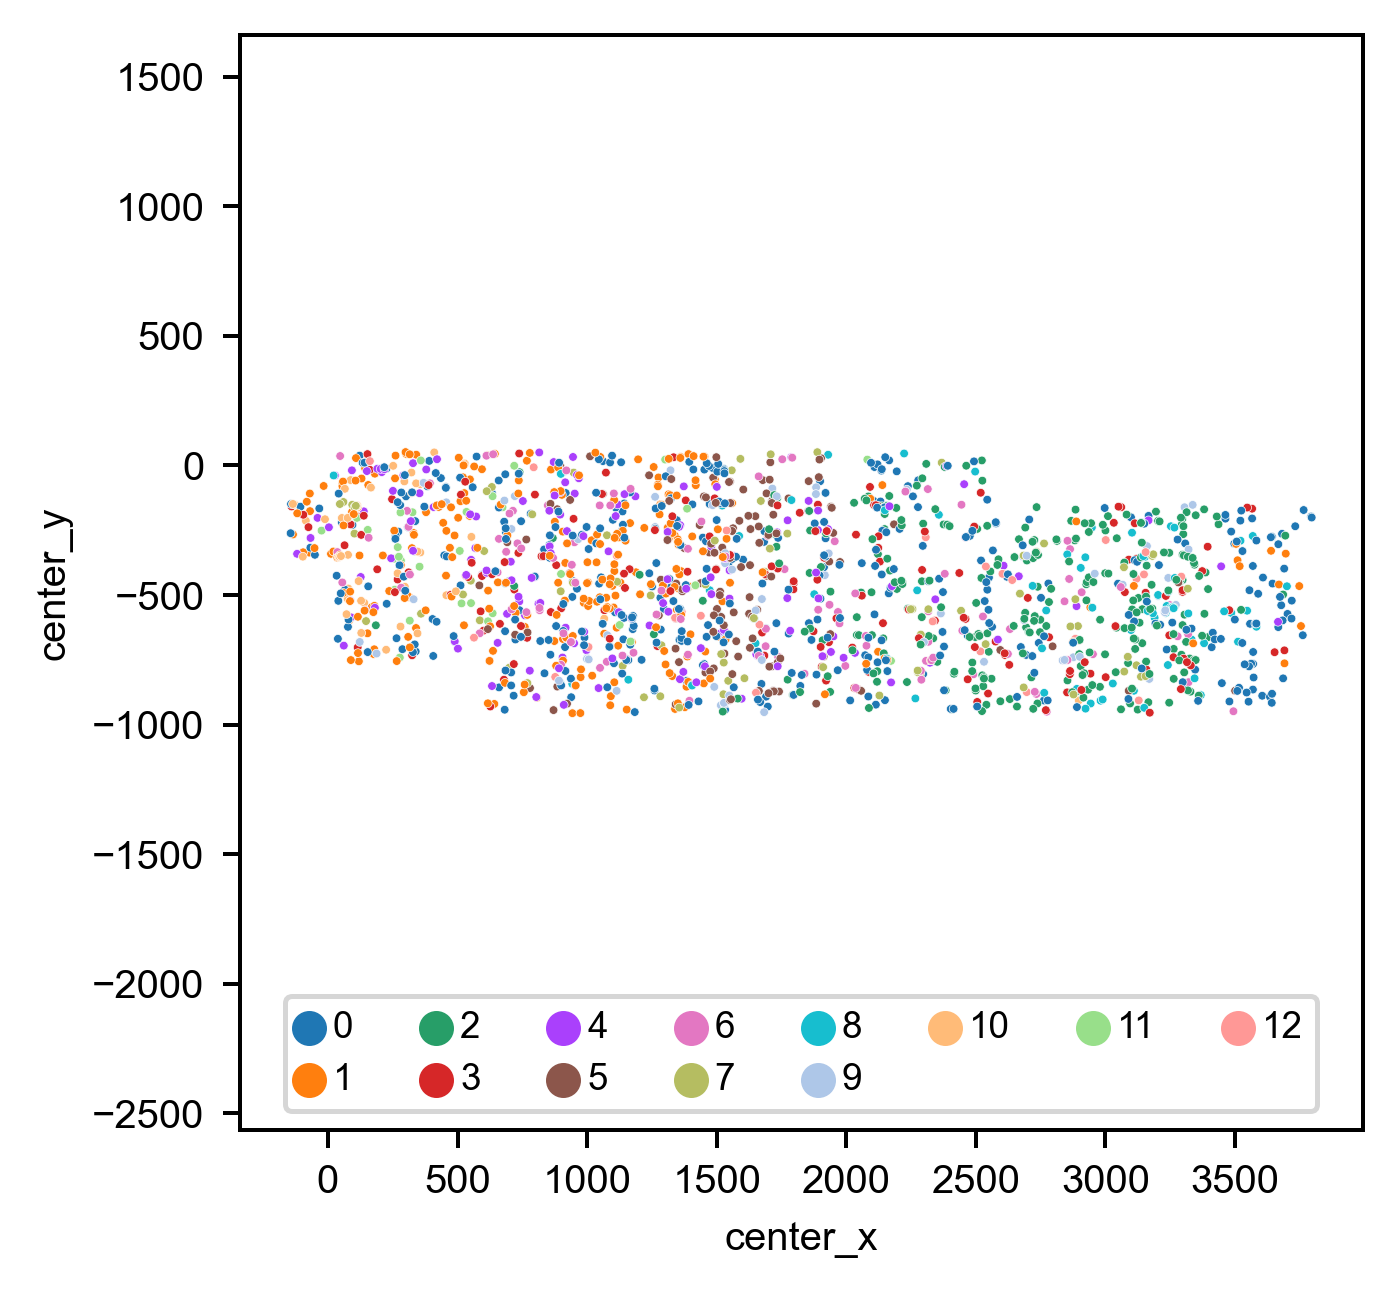

In [18]:
# visualzie the spatial dist for clusters
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
ax = sns.scatterplot(data=adata.obs, x='center_x', y='center_y', 
                hue='leiden', s=3, legend=True,)
ax.grid(False)
plt.axis('equal')
hs, ls = ax.get_legend_handles_labels()
ax.legend(hs,ls, ncol=8, loc=8)
#plt.xlim([2250,3850])
#plt.ylim([-1600,0])

## 5. Check count for each cell for genes of interest

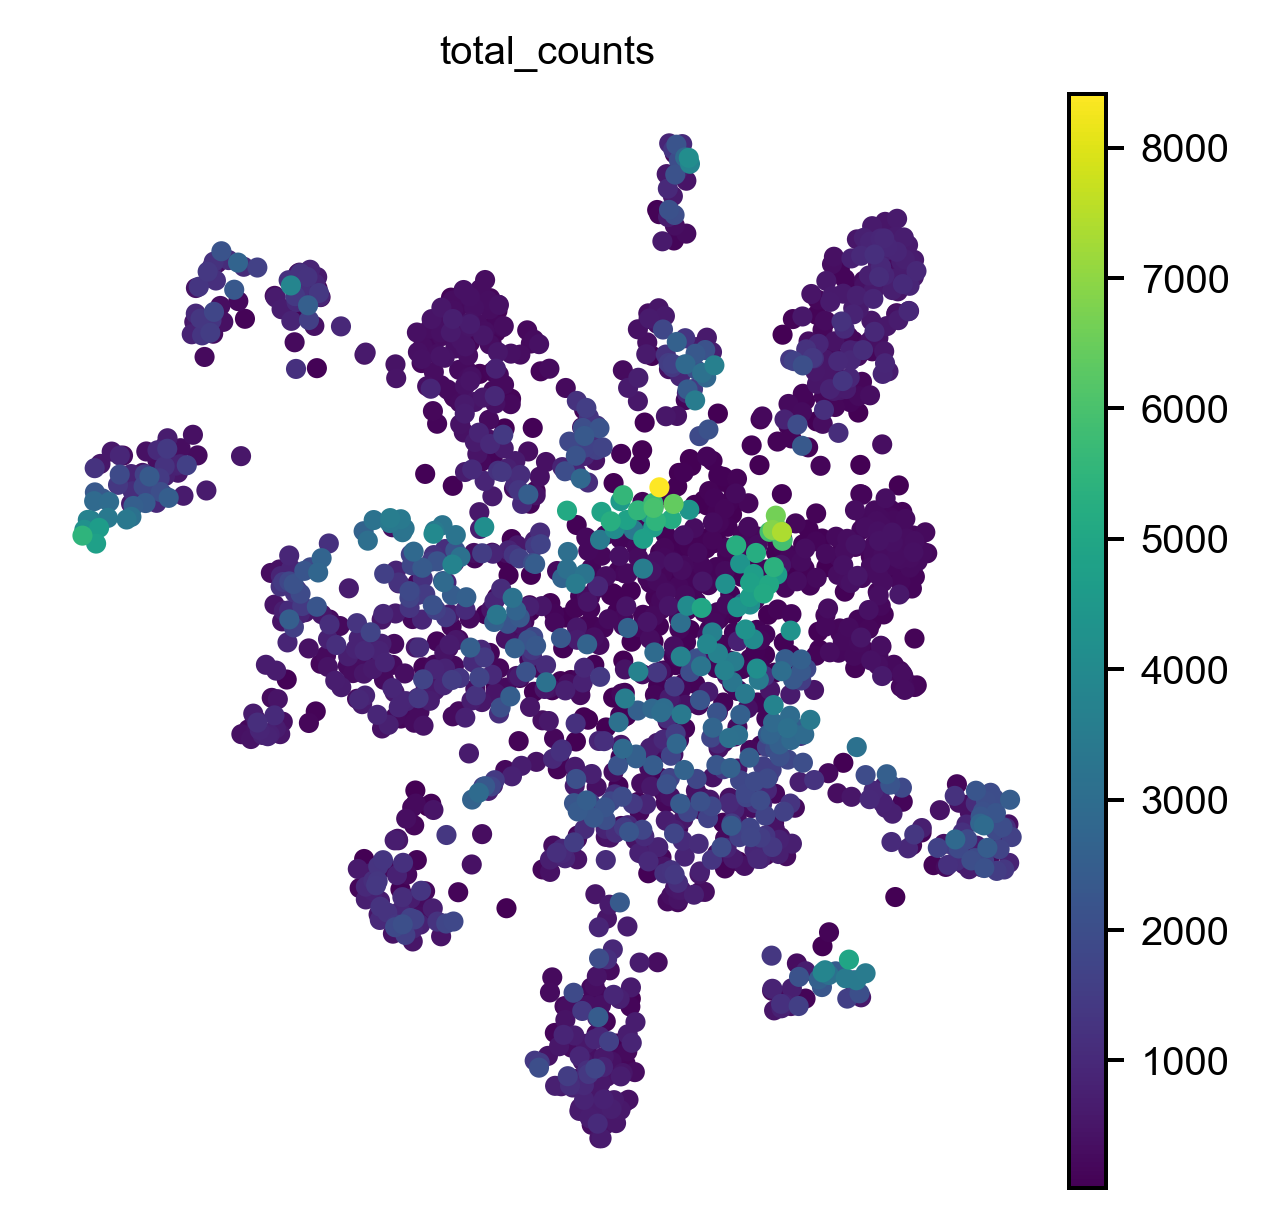

In [19]:
sc.pl.umap(adata, color='total_counts')

## 6.UMAP can be done using different settings and can be saved into different label column for cell type classifer use later

## 6.1 Use higher expected pcs and resolution to UMAP for cell-type distinction at "cluster" level

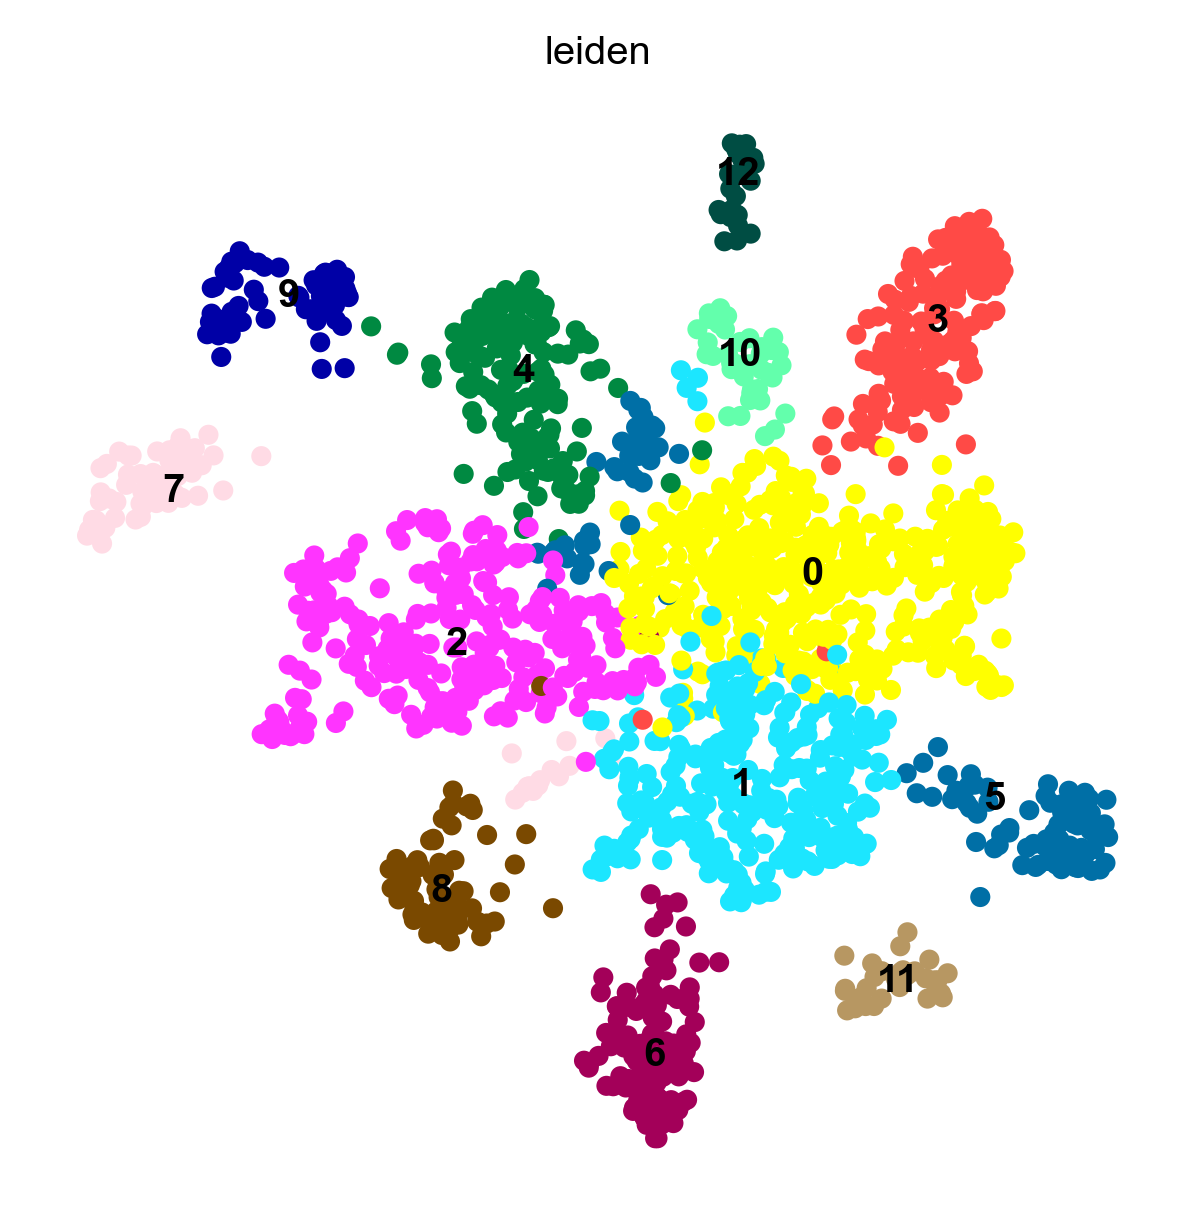

Wall time: 5.09 s


In [24]:
%%time
# Computing the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

sc.tl.leiden(adata, resolution=0.5)

sc.tl.umap(adata)
# Plot the UMAP
sc.pl.umap(adata, color='leiden', legend_loc='on data')

# save this labels as a new column as 'leiden_cluster'
adata.obs['leiden_cluster'] = adata.obs.leiden

## 6.2 Use lower expected pcs and resolution to UMAP for cell-type distinction at subclass level

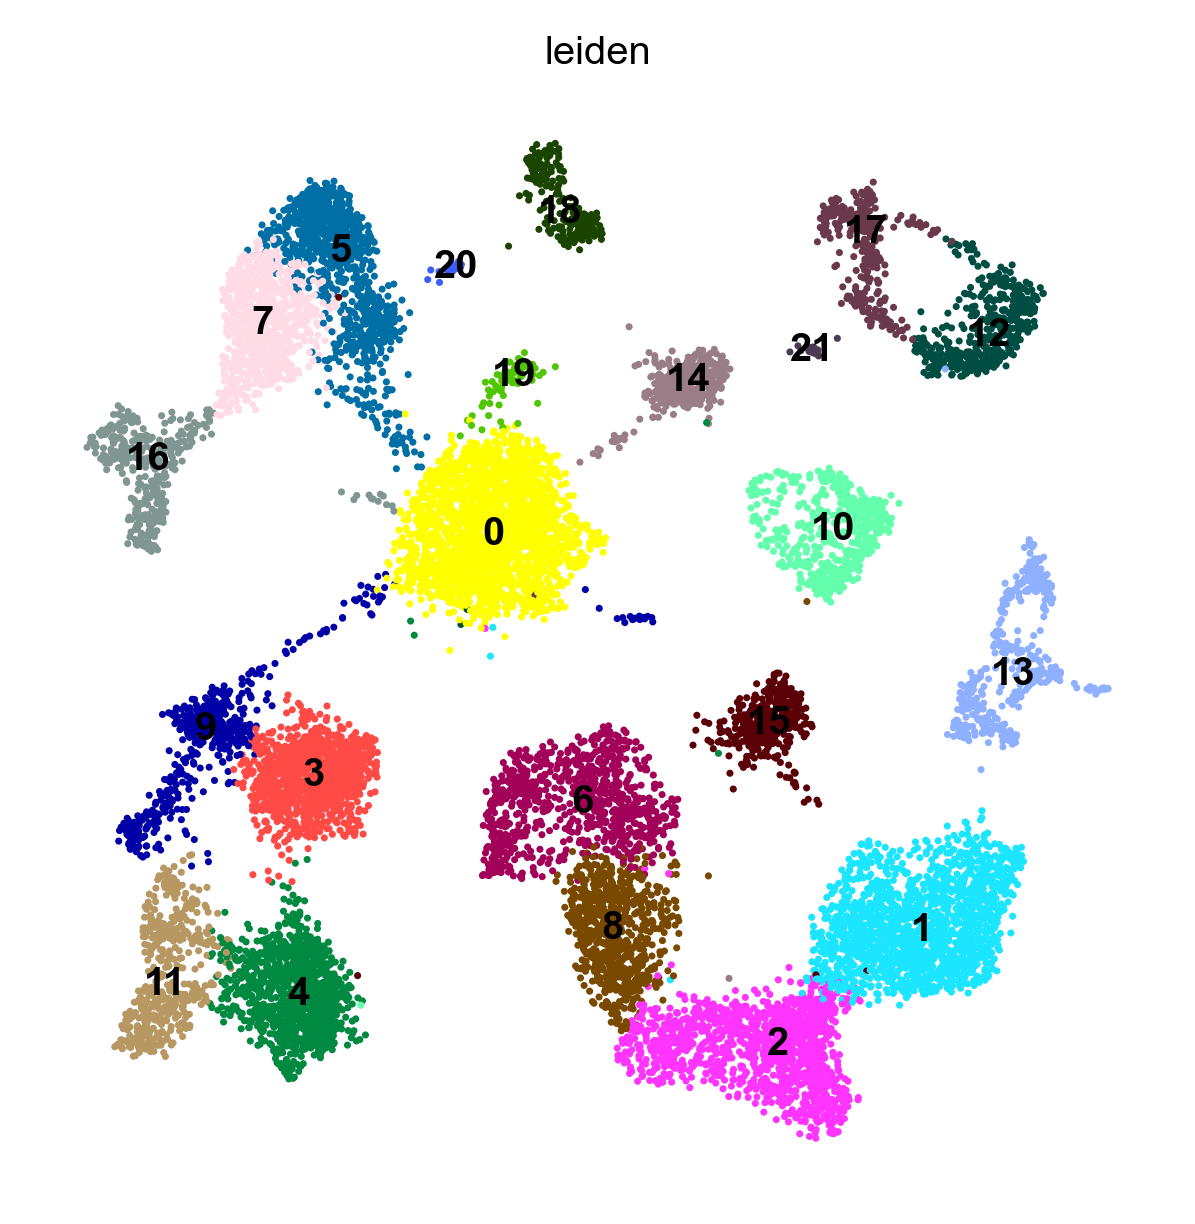

Wall time: 12.1 s


In [23]:
%%time
# Computing the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

sc.tl.leiden(adata, resolution=1)

sc.tl.umap(adata)
# Plot the UMAP
sc.pl.umap(adata, color='leiden', legend_loc='on data')

# save this new labels as a new column as 'leiden_subclass'
adata.obs['leiden_subclass'] = adata.obs.leiden

# 7. Save the analyzed MERFISH adata in h5ad for later use (e.g., cell classifer)

In [24]:
save_filename = os.path.join(os.path.join(postanalysis_folder, 'filtered_cluster_data.h5ad'))

overwrite = True

if not os.path.exists(save_filename) or overwrite:
    print(f"save adata into file: {save_filename}")
    adata.write(save_filename)
else:
    print(f"savefile: {save_filename} already exists")

save adata into file: \\mendel\Mendel_SSD3\MERFISH_Analysis\20220415-M1_renamed_storm65\PostAnalysis\filtered_cluster_data.h5ad


# 8. Cell type classifier

## 8.1 train classfier with Meng's dataset

In [25]:
meng_merfish_raw = r'\\mendel\Mendel_SSD3\MERFISH_Analysis\Meng_data\counts.h5ad'
merfish_raw = sc.read_h5ad(meng_merfish_raw)
meng_merfish_label = r'\\mendel\Mendel_SSD3\MERFISH_Analysis\Meng_data\cell_labels.csv'
merfish_label = pd.read_csv(meng_merfish_label, index_col=0)

In [26]:
merData = pd.DataFrame(merfish_raw.X, index = merfish_raw.obs.index, columns = merfish_raw.var.index)
labels = merfish_label.loc[merfish_label['label']!='-1']
# merge dataframes
merCluster=merData.merge(labels, how='inner', left_index=True, right_index=True)

index                                    1700022I11Rik  1810046K07Rik  \
index                                                                   
10000143038275111136124942858811168393             0.0       0.000000   
100001798412490480358118871918100400402            0.0       0.000000   
100006878605830627922364612565348097824            0.0       0.000000   
100007228202835962319771548915451072492            0.0       0.000000   
100009332472089331948140672873134747603            0.0       0.491629   
...                                                ...            ...   
99987465505639073211021560543065098772             0.0       0.000000   
99989592830367590092304100078674096866             0.0       0.000000   
99991756591196613545069880666241120777             0.0       0.000000   
99997421766159526763299676887100858104             0.0       0.000000   
99997470167777465101376150817407669505             0.0       0.475026   

index                                    5031425F14Rik  5730522E02Rik  \
index                                                                   
10000143038275111136124942858811168393             0.0       0.000000   
100001798412490480358118871918100400402            0.0       0.000000   
100006878605830627922364612565348097824            0.0       0.000000   
100007228202835962319771548915451072492            0.0       0.000000   
100009332472089331948140672873134747603            0.0       0.983257   
...                                                ...            ...   
99987465505639073211021560543065098772             0.0       0.557620   
99989592830367590092304100078674096866             0.0       0.000000   
99991756591196613545069880666241120777             0.0       0.000000   
99997421766159526763299676887100858104             0.0       0.000000   
99997470167777465101376150817407669505             0.0       0.475026   

index                                        Acta2  Adam2   Adamts2   Adamts4  \
index                                                                           
10000143038275111136124942858811168393    0.000000    0.0  0.000000  0.000000   
100001798412490480358118871918100400402   0.000000    0.0  0.000000  0.000000   
100006878605830627922364612565348097824  25.567039    0.0  0.000000  0.000000   
100007228202835962319771548915451072492   0.000000    0.0  0.000000  0.000000   
100009332472089331948140672873134747603   0.491629    0.0  0.000000  0.000000   
...                                            ...    ...       ...       ...   
99987465505639073211021560543065098772    0.000000    0.0  0.000000  0.000000   
99989592830367590092304100078674096866    0.000000    0.0  0.000000  1.829112   
99991756591196613545069880666241120777    0.000000    0.0  0.000000  0.000000   
99997421766159526763299676887100858104    0.000000    0.0  0.000000  0.000000   
99997470167777465101376150817407669505    0.000000    0.0  0.475026  0.000000   

index                                       Adra1b       Alk  ...      Gad2  \
index                                                         ...             
10000143038275111136124942858811168393    0.659448  0.000000  ...  0.261892   
100001798412490480358118871918100400402   0.000000  0.000000  ...  0.512115   
100006878605830627922364612565348097824   0.000000  0.000000  ...  0.199059   
100007228202835962319771548915451072492   0.000000  0.000000  ...  0.240500   
100009332472089331948140672873134747603   0.983257  0.000000  ...  1.726676   
...                                            ...       ...  ...       ...   
99987465505639073211021560543065098772    0.557620  2.788098  ...  4.711612   
99989592830367590092304100078674096866   14.632893  0.000000  ...  0.354238   
99991756591196613545069880666241120777    0.000000  0.000000  ...  0.944207   
99997421766159526763299676887100858104    2.795264  0.000000  ...  0.581056   
99997470167777465101376150817407669505    0.000000  0.000000  ...  3.059676   

index             

In [28]:
from sklearn import preprocessing
# Scale variable measurements for model training
merGroupedDataZ = pd.DataFrame(preprocessing.scale(merCluster.iloc[:,:-5]),index = merCluster.iloc[:,:-5].index, columns = merCluster.iloc[:,:-5].columns)

merGroupedDataZ['subclass'] = merCluster.iloc[:,-2]

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


## 8.2 train classfier with Meng's dataset

In [30]:
adata_ref = merGroupedDataZ

# Train the classifer using the shared varibales
genes_from_ref = set(merData.columns)
genes = list(genes_from_ref.intersection(set(adata.var.index)))

In [32]:
%%time
from sklearn.neural_network import MLPClassifier

# Train a classifier
gene_ids = [merData.columns.get_loc(g) for g in genes]

print('Train cell type classifier.')

X = np.array(adata_ref.iloc[:,:-1])[:, gene_ids]
Y = np.array(adata_ref['subclass'])
nnc = MLPClassifier(max_iter = 500)
nnc.fit(X, Y)

Train cell type classifier.
Wall time: 5min 24s


MLPClassifier(max_iter=500)

# 8.3 initial prediction

In [33]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib inline

In [34]:
import ImageAnalysis3.celltype_tools.classifier as clsf

Predict cell types.


C:\Users\puzheng\AppData\Local\Temp/ipykernel_30876/502447268.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_counts['count'] = 1


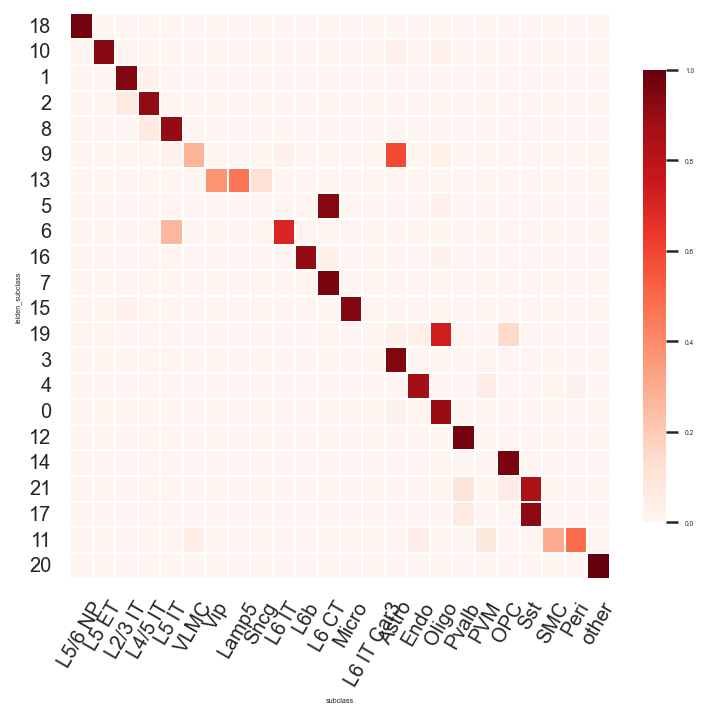

In [36]:
prediction_column = 'subclass_prediction_label'

ref_cluster_column = 'subclass'

# determine which class to query
query_cluster_column = 'leiden_subclass'
#query_cluster_column = 'leiden_cluster'

print('Predict cell types.')
clsf.predict_classes(nnc, adata, prediction_column, genes)
 
    
## Count predictions
prediction_counts = adata.obs[[query_cluster_column, prediction_column]]
prediction_counts['count'] = 1

predictionMatrix = pd.pivot_table(prediction_counts, index=[query_cluster_column],
               columns=[prediction_column], values='count', aggfunc=np.sum).fillna(0)

predictionMatrix['total'] = predictionMatrix.sum(axis = 1)
    
fractions = predictionMatrix.iloc[:,:-1].div(predictionMatrix['total'],axis = 0)
    
#fractions_sorted, rows, columns = clsf.runPermutation(fractions,'Columns')
fractions_sorted, rows, columns = clsf.runPermutation(fractions,'Both')
    
# Plot
fig1=plt.figure(figsize = (6,5))
sns.set(font_scale=0.3)
#sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
sns.heatmap(fractions_sorted, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .8})
    
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)   
plt.xticks(rotation = 60)
plt.yticks(rotation = 'horizontal')
plt.xlabel(ref_cluster_column) 
plt.ylabel(query_cluster_column)
plt.show()

In [55]:
sc.settings.n_jobs = 24
sc.settings.figdir = postanalysis_folder
sc.settings.set_figure_params(dpi=150, dpi_save=300, frameon=False, 
                              figsize=(4, 4), fontsize=8, facecolor='white',)

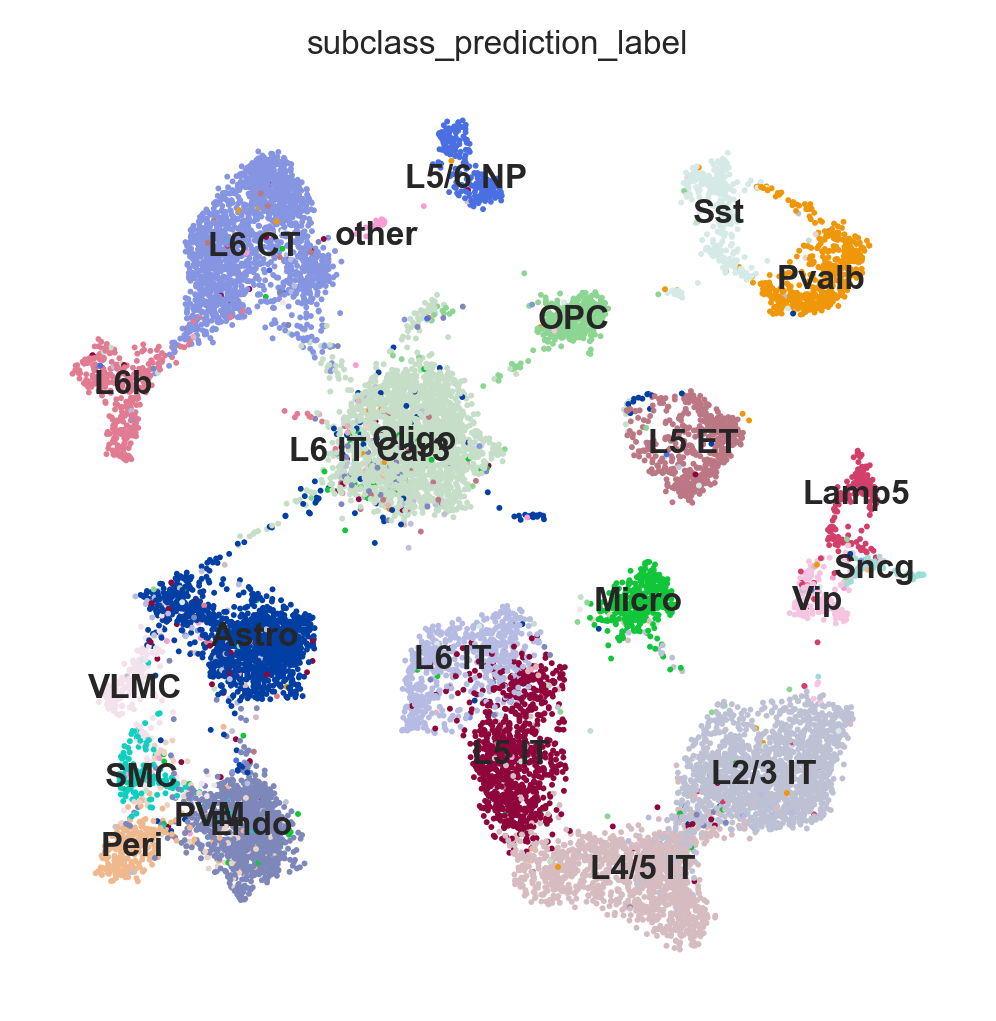

In [38]:
# Plot the predicted labels on UMAP to guide the manual labeling of the de novo clustering below
# use this to manually merge and split the original query column (e.g., leiden_subclass)
sc.pl.umap(adata, color='subclass_prediction_label', legend_loc='on data')

### plot clustering as ref

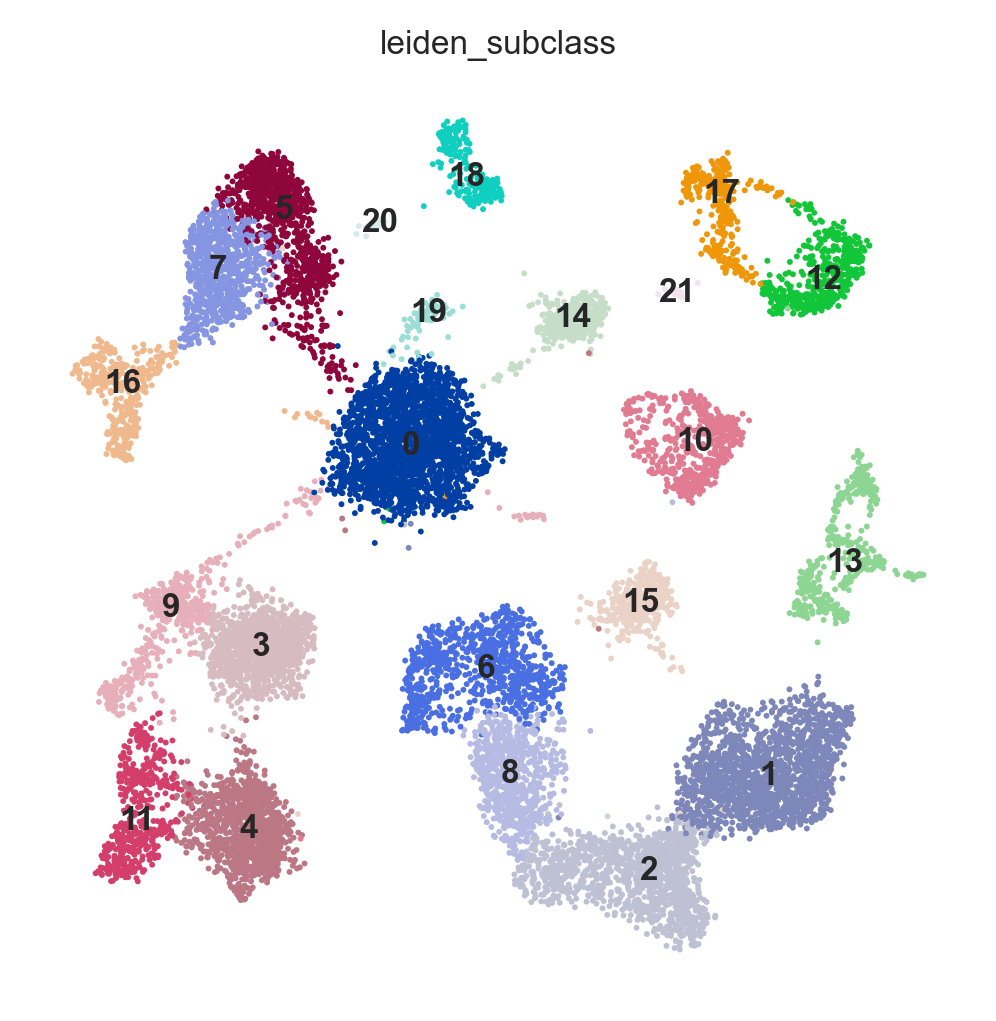

In [39]:
sc.pl.umap(adata, color='leiden_subclass', legend_loc='on data')

## 8.4 Split labels

by comparing two UMAP above, we could estimate which cluster should be further splitted

In [176]:
adata.obs['leiden_subclass_sub'] = adata.obs['leiden_subclass'] 
sc.tl.leiden(adata, resolution=0.3,restrict_to=('leiden_subclass_sub',['0']),
             key_added='leiden_subclass_sub')
sc.tl.leiden(adata, resolution=0.5,restrict_to=('leiden_subclass_sub',['13']),
             key_added='leiden_subclass_sub')
sc.tl.leiden(adata, resolution=1,restrict_to=('leiden_subclass_sub',['13,1']),
             key_added='leiden_subclass_sub')
#sc.tl.leiden(adata, resolution=0.8,restrict_to=('leiden_subclass_sub',['13,1,2']),
#             key_added='leiden_subclass_sub')
sc.tl.leiden(adata, resolution=0.2,restrict_to=('leiden_subclass_sub',['11']),
             key_added='leiden_subclass_sub')
sc.tl.leiden(adata, resolution=0.2,restrict_to=('leiden_subclass_sub',['9']),
             key_added='leiden_subclass_sub')
sc.tl.leiden(adata, resolution=0.5,restrict_to=('leiden_subclass_sub',['4']),
             key_added='leiden_subclass_sub')


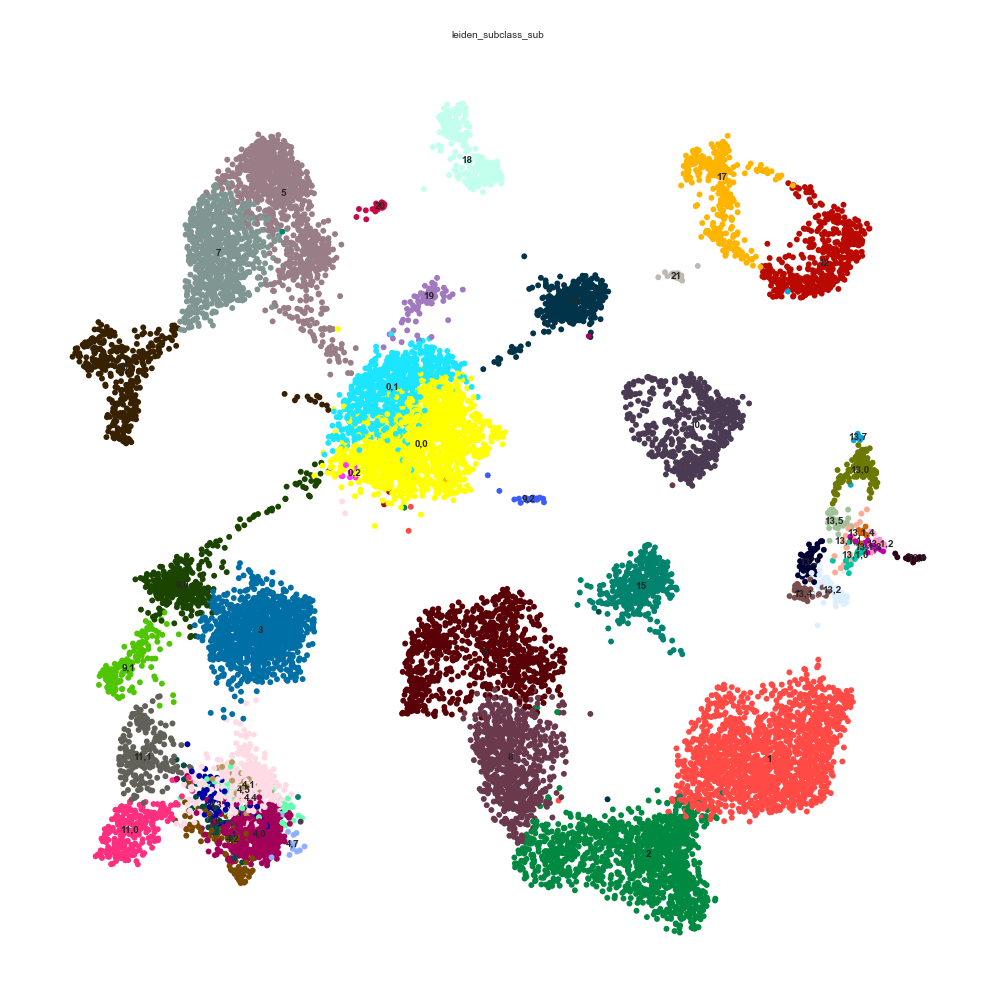

In [177]:
sc.pl.umap(adata, color='leiden_subclass_sub', legend_loc='on data', cmap='Spectral')

## 8.5 further predict splitted groups

Predict cell types.


C:\Users\puzheng\AppData\Local\Temp/ipykernel_30876/1454245228.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_counts['count'] = 1


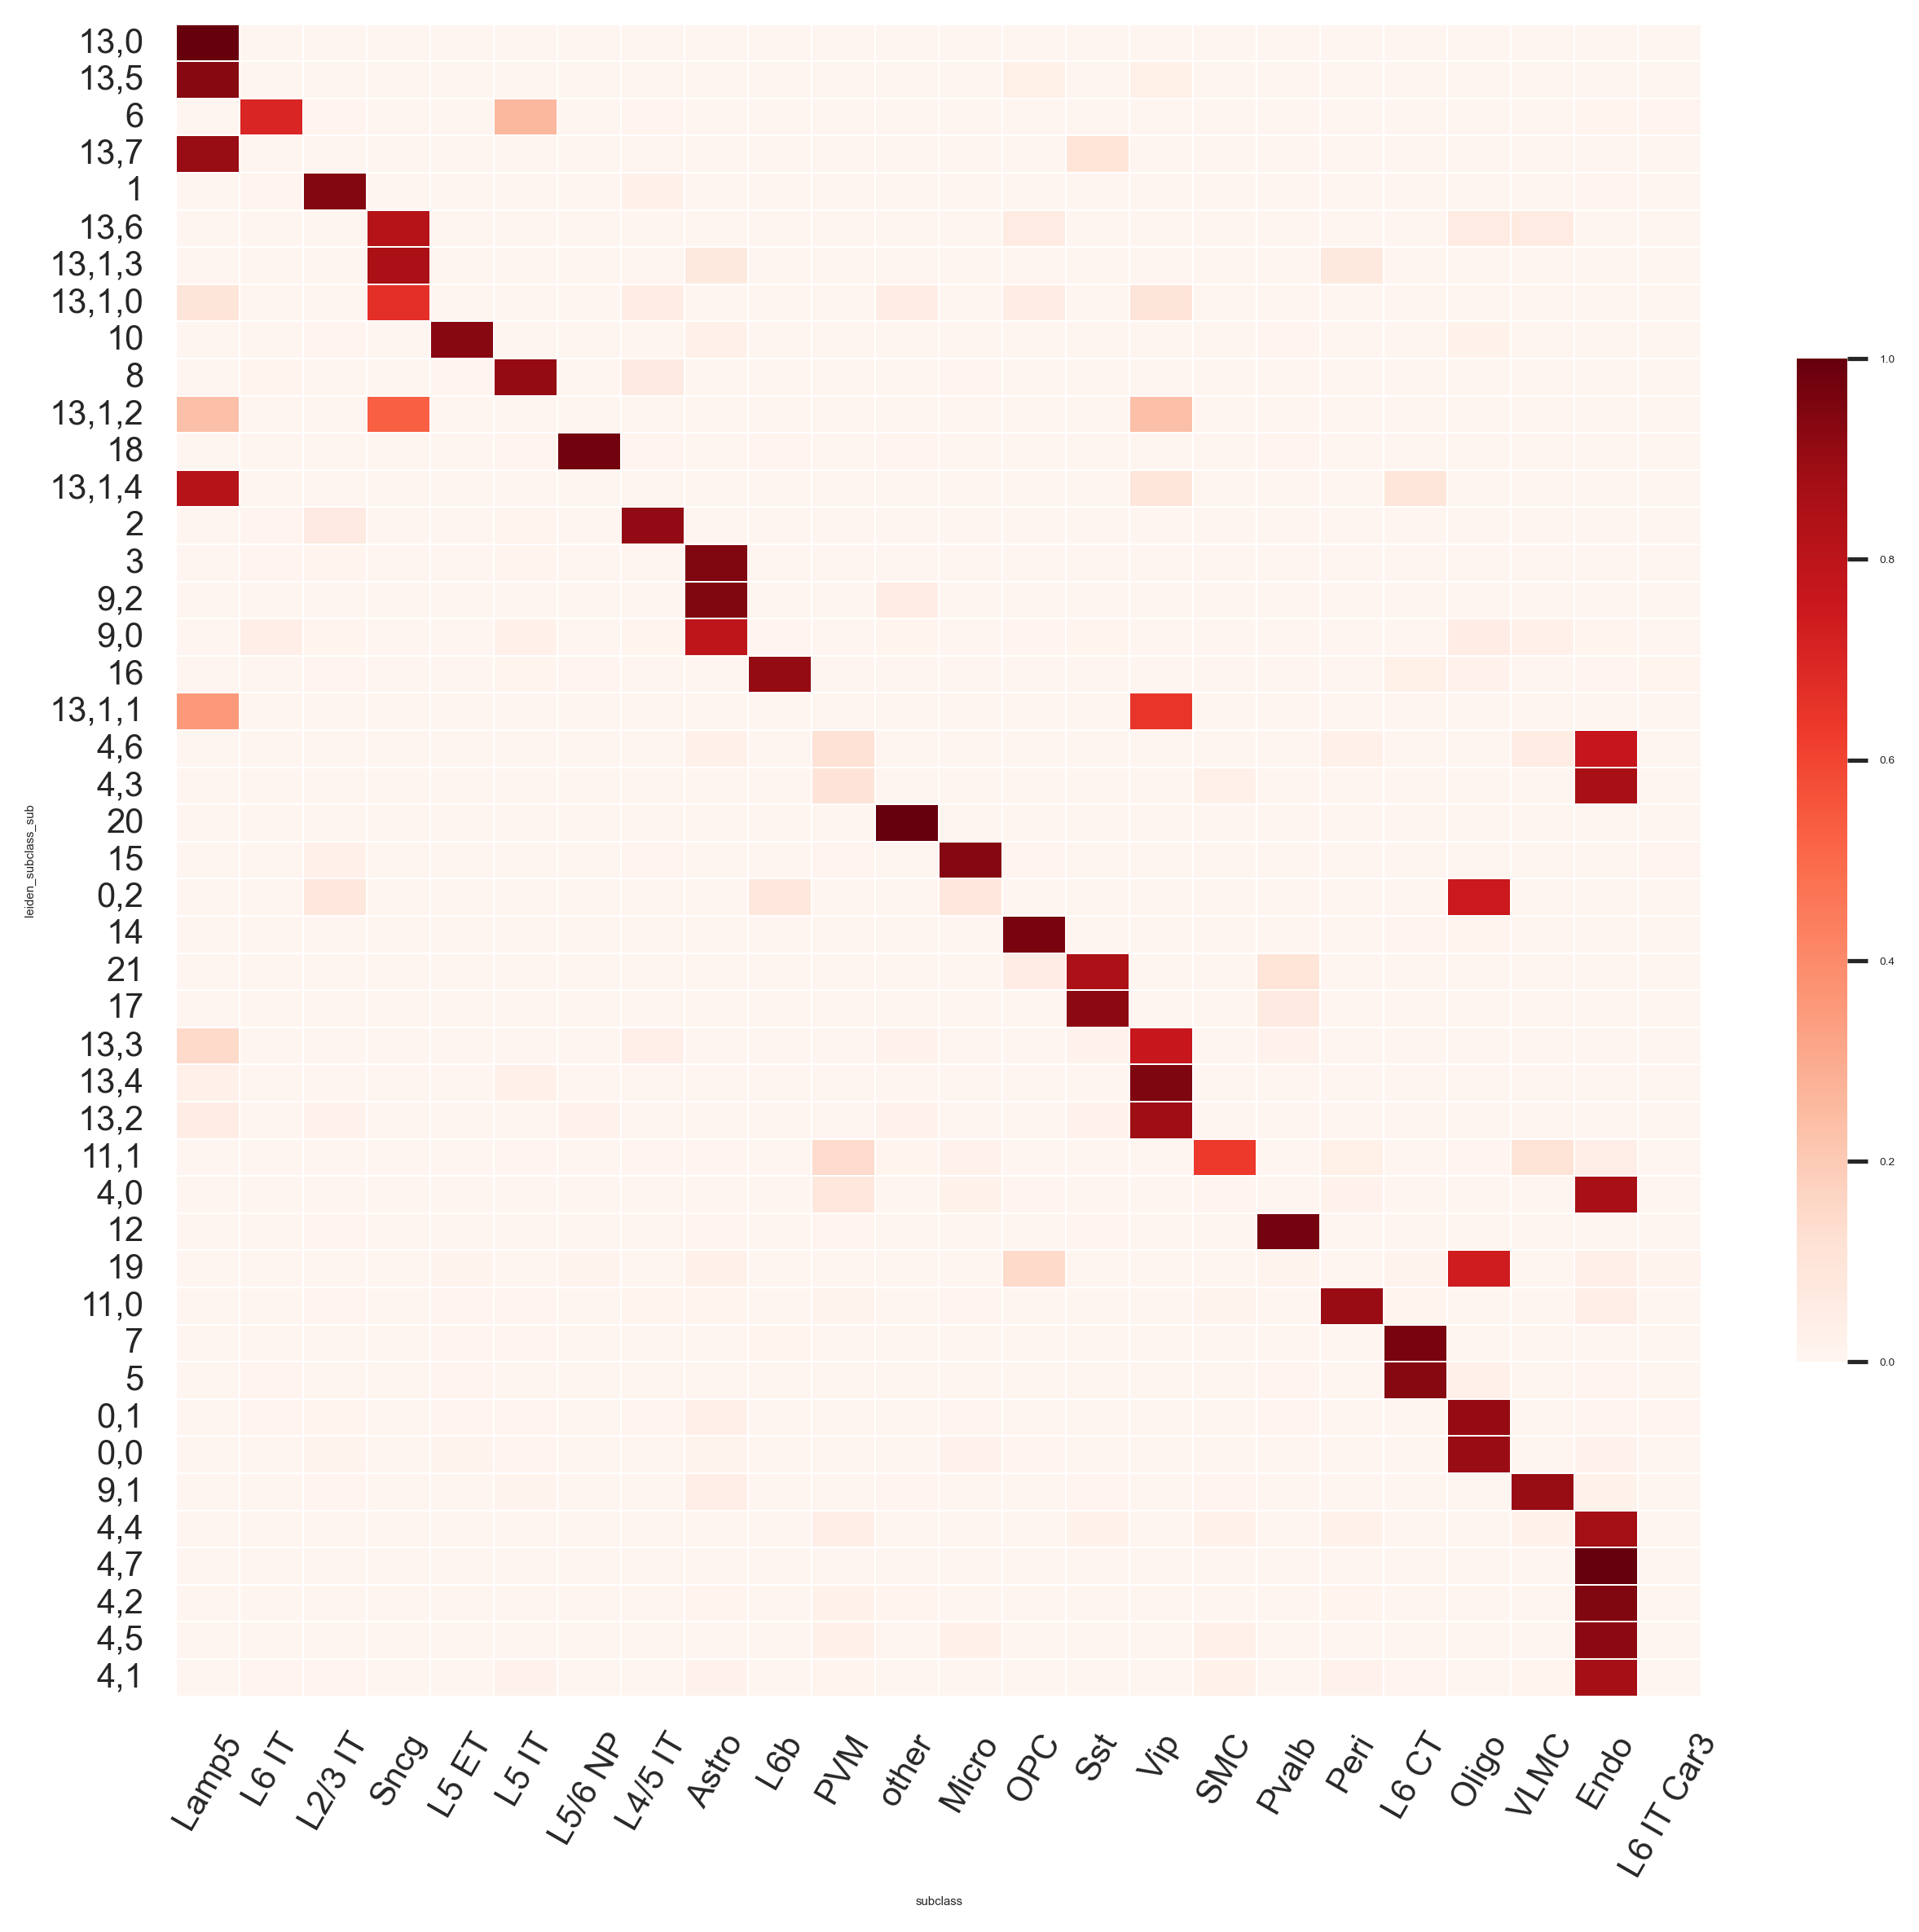

In [178]:
prediction_column = 'subclass_prediction_label'

ref_cluster_column = 'subclass'

# determine which class to query
query_cluster_column = 'leiden_subclass_sub'
#query_cluster_column = 'leiden_cluster'

print('Predict cell types.')
clsf.predict_classes(nnc, adata, prediction_column, genes)
 
    
## Count predictions
prediction_counts = adata.obs[[query_cluster_column, prediction_column]]
prediction_counts['count'] = 1

predictionMatrix = pd.pivot_table(prediction_counts, index=[query_cluster_column],
               columns=[prediction_column], values='count', aggfunc=np.sum).fillna(0)

predictionMatrix['total'] = predictionMatrix.sum(axis = 1)
    
fractions = predictionMatrix.iloc[:,:-1].div(predictionMatrix['total'],axis = 0)
    
#fractions_sorted, rows, columns = clsf.runPermutation(fractions,'Columns')
fractions_sorted, rows, columns = clsf.runPermutation(fractions,'Both')
    
# Plot
fig1=plt.figure(figsize = (10,9))
sns.set(font_scale=0.3)
#sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
sns.heatmap(fractions_sorted, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)   
plt.xticks(rotation = 60)
plt.yticks(rotation = 'horizontal')
plt.xlabel(ref_cluster_column) 
plt.ylabel(query_cluster_column)
plt.show()

## 8.6 Assign most of uniquely classfied clusters

In [179]:
first_assign_dict = {}
# Automatic assign best fit if applicable
assign_th = 0.6
for _cluster, _vec in fractions.iterrows():
    #_cluster, _vec
    _matched_inds = np.where(_vec >= assign_th)[0]
    # if uniquely matched:
    if len(_matched_inds) == 1:
        print(_cluster, list(_vec.keys())[_matched_inds[0]])
        first_assign_dict[_cluster] = list(_vec.keys())[_matched_inds[0]]

0,0 Oligo
0,1 Oligo
0,2 Oligo
1 L2/3 IT
2 L4/5 IT
3 Astro
4,0 Endo
4,1 Endo
4,2 Endo
4,3 Endo
4,4 Endo
4,5 Endo
4,6 Endo
4,7 Endo
5 L6 CT
6 L6 IT
7 L6 CT
8 L5 IT
9,0 Astro
9,1 VLMC
9,2 Astro
10 L5 ET
11,0 Peri
11,1 SMC
12 Pvalb
13,0 Lamp5
13,1,0 Sncg
13,1,1 Vip
13,1,3 Sncg
13,1,4 Lamp5
13,2 Vip
13,3 Vip
13,4 Vip
13,5 Lamp5
13,6 Sncg
13,7 Lamp5
14 OPC
15 Micro
16 L6b
17 Sst
18 L5/6 NP
19 Oligo
20 other
21 Sst


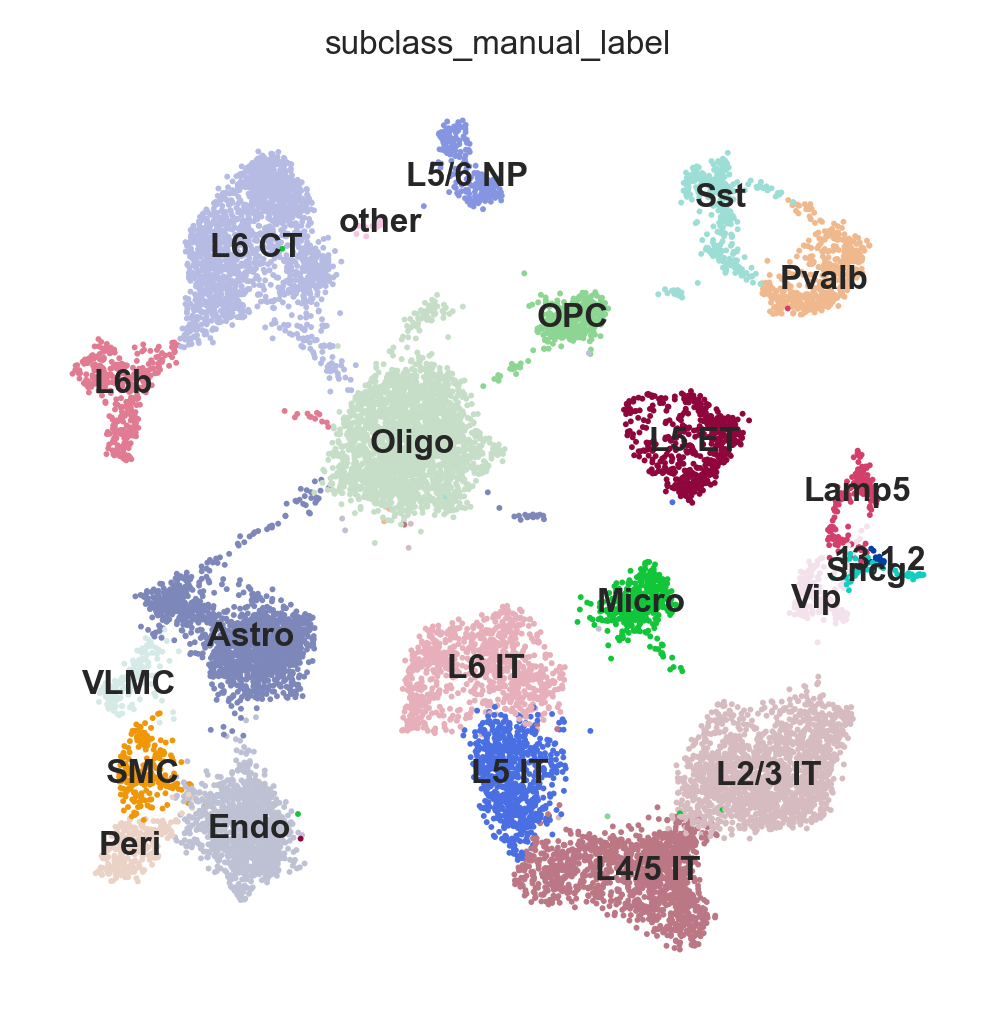

In [183]:
adata.obs['subclass_manual_label'] = adata.obs['leiden_subclass_sub'] 
adata.obs = adata.obs.replace({'subclass_manual_label':first_assign_dict})
# Check the leftover
np.unique(adata.obs['subclass_manual_label'])
# Plot the predicted sub-subclass
sc.pl.umap(adata, color='subclass_manual_label', legend_loc='on data',)

## 8.7 Manual assign leftovers

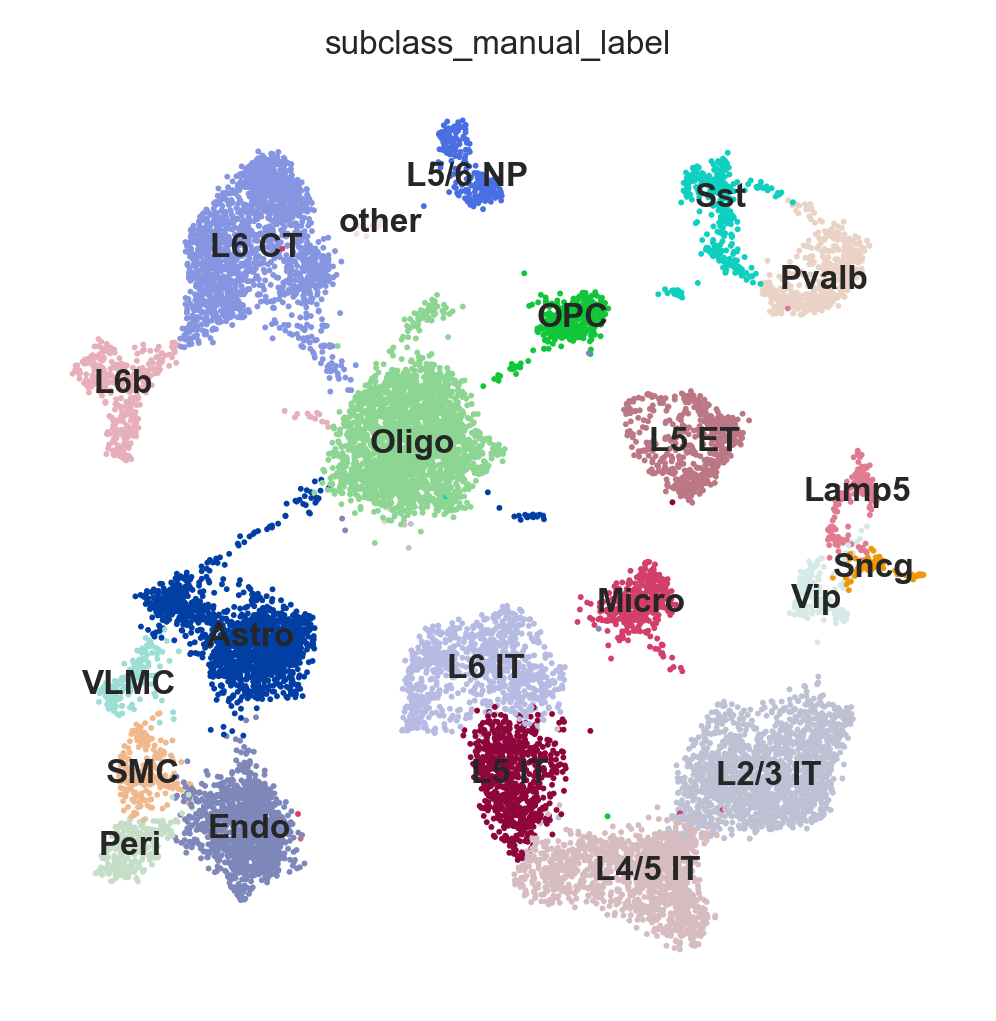

In [182]:
#adata.obs = adata.obs.replace({'subclass_manual_label':{'6':'L6 IT'}})
#adata.obs = adata.obs.replace({'subclass_manual_label':{'9,0':'Astro'}})
#adata.obs = adata.obs.replace({'subclass_manual_label':{'11,1':'SMC'}})
#adata.obs = adata.obs.replace({'subclass_manual_label':{'19':'Oligo', '0,2':'Oligo'}})
adata.obs = adata.obs.replace({'subclass_manual_label':{'13,1,2':'Sncg'}})
#adata.obs = adata.obs.replace({'subclass_manual_label':{'13,3':'Vip'}})

np.unique(adata.obs['subclass_manual_label'])

sc.pl.umap(adata, color='subclass_manual_label', legend_loc='on data',)

# 9. Redo prediction for manual labels

Check consistency between manual labels vs. predict labels

Predict cell types: subclass_manual_label


C:\Users\puzheng\AppData\Local\Temp/ipykernel_30876/1525045723.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_counts['count'] = 1


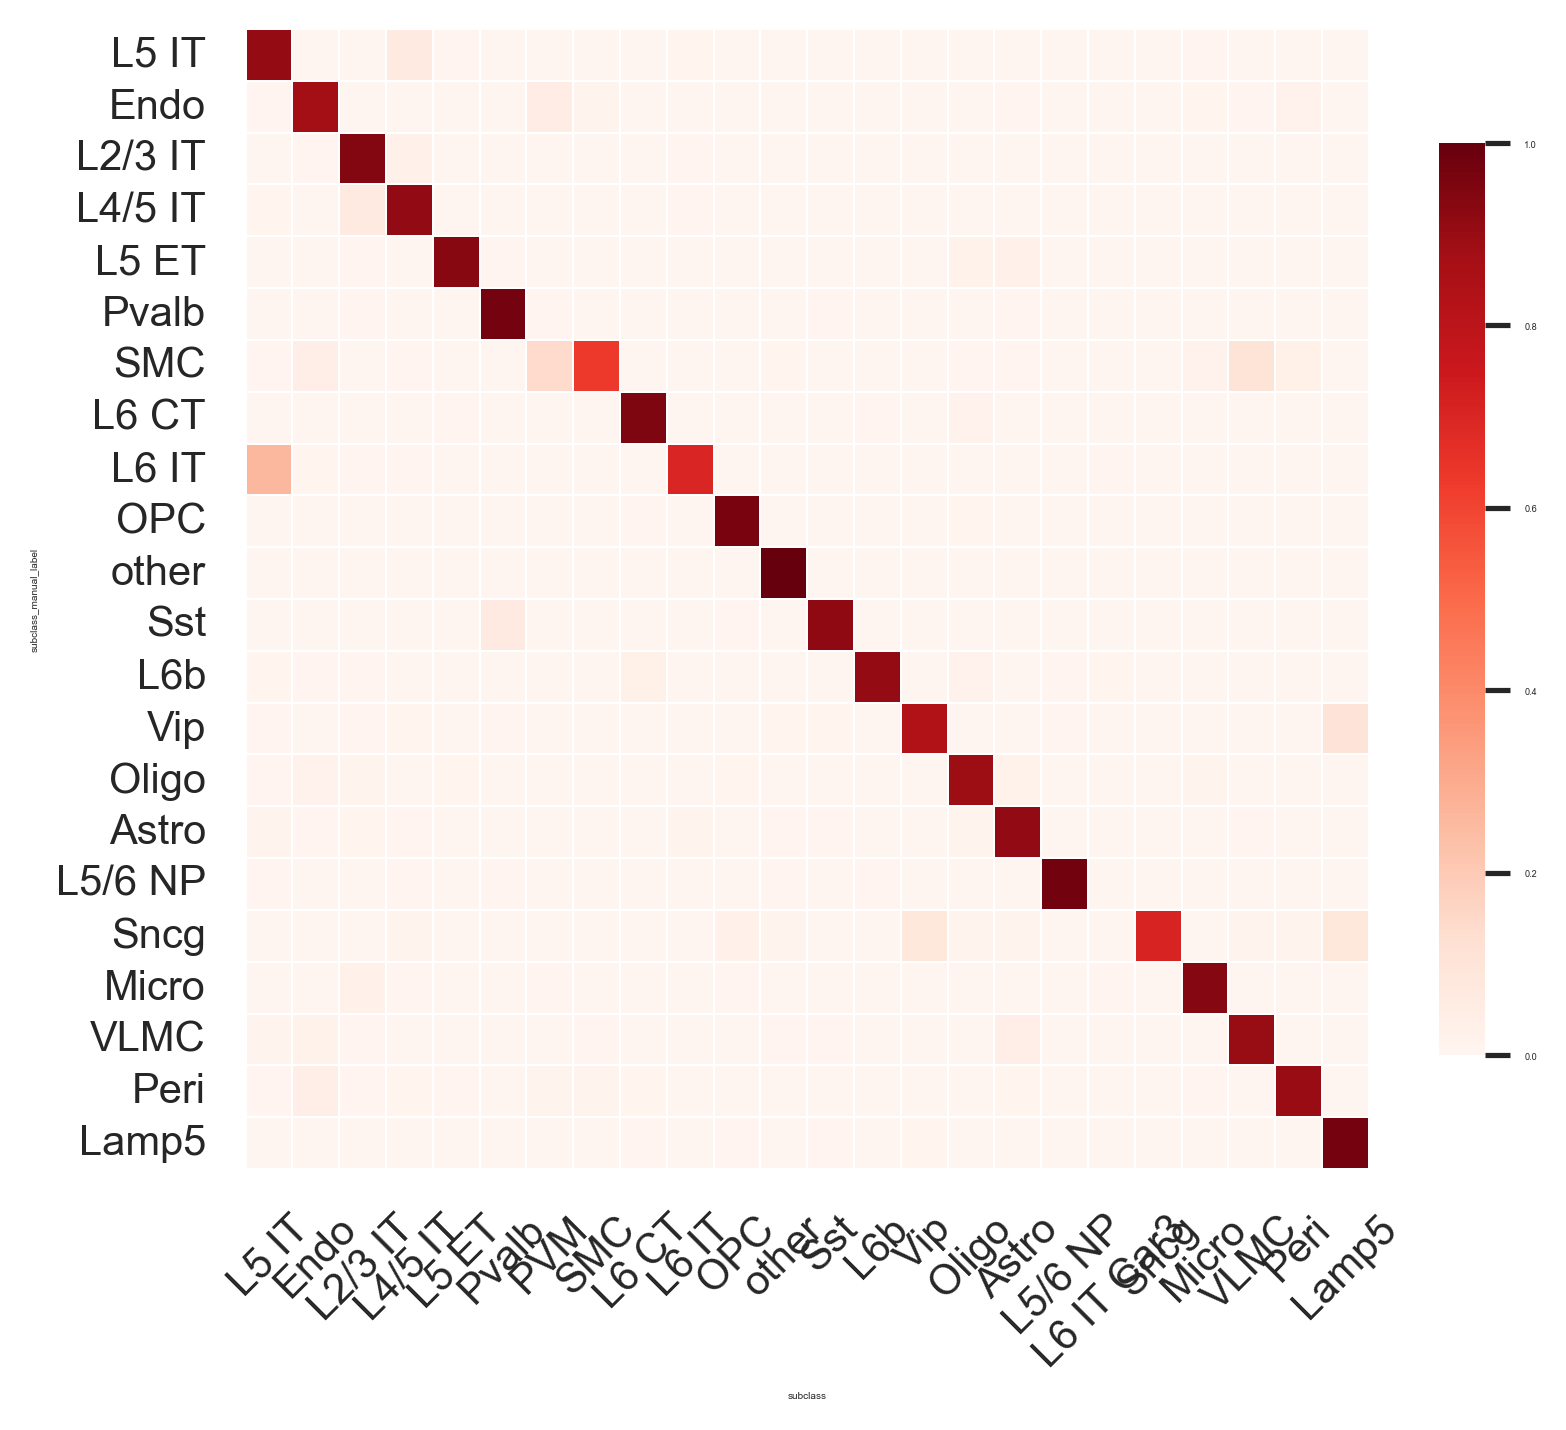

In [174]:
prediction_column = 'subclass_manual_label_predict'

ref_cluster_column = 'subclass'

# determine which class to query
query_cluster_column = 'subclass_manual_label'

print(f'Predict cell types: {query_cluster_column}')
clsf.predict_classes(nnc, adata, prediction_column, genes)
 
    
## Count predictions
prediction_counts = adata.obs[[query_cluster_column, prediction_column]]
prediction_counts['count'] = 1

predictionMatrix = pd.pivot_table(prediction_counts, index=[query_cluster_column],
               columns=[prediction_column], values='count', aggfunc=np.sum).fillna(0)

predictionMatrix['total'] = predictionMatrix.sum(axis = 1)
    
fractions = predictionMatrix.iloc[:,:-1].div(predictionMatrix['total'],axis = 0)
    
#fractions_sorted, rows, columns = clsf.runPermutation(fractions,'Columns')
fractions_sorted, rows, columns = clsf.runPermutation(fractions,'Both')
    
# Plot
fig1=plt.figure(figsize = (6,5))
sns.set(font_scale=0.2)

sns.heatmap(fractions_sorted, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .8})
    
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)   
plt.xticks(rotation = 45)
plt.yticks(rotation = 'horizontal')
plt.xlabel(ref_cluster_column) 
plt.ylabel(query_cluster_column)
plt.show()

# 10. Save manually labeled data

In [175]:
save_filename = os.path.join(os.path.join(postanalysis_folder, 'manual_labeled_data.h5ad'))

overwrite = True

if not os.path.exists(save_filename) or overwrite:
    print(f"save adata into file: {save_filename}")
    adata.write(save_filename)
else:
    print(f"savefile: {save_filename} already exists")

save adata into file: \\mendel\Mendel_SSD3\MERFISH_Analysis\20220415-M1_renamed_storm65\PostAnalysis\manual_labeled_data.h5ad
